# Version

In [1]:
k = 1

# Import python dataset

In [2]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import time
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import tensorflow as tf
from keras import Input, Model
from keras.models import Sequential, Model, load_model


import random

import sys
sys.path.append("..")

import dataset,network

In [3]:
from __future__ import print_function, division
import tensorflow.keras.backend as backend
from tensorflow import reduce_mean
import keras
from keras import losses, backend
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply, GaussianNoise
from keras.models import Sequential, Model
from keras.constraints import Constraint

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_swiss_roll
from sklearn.preprocessing import *
import functools
import time
import gc
from keras.initializers import RandomNormal



# Load Data

In [4]:
# Preprocessing

scenario= "moons" #sinus, helix
n_instance = 1000
n_features = 2
Z = 6 #3的倍數
nodes = 8 #4
var = 4
use_bias = 'True'
scales = ['-1-1','0-1']
scaled = '-1-1'

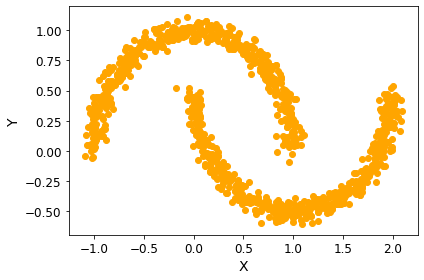

In [5]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='orange')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='orange', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [6]:
#storage data
os.system('mkdir Dataset')
os.system('mkdir AAE')
os.system('mkdir AAE/Models')
os.system('mkdir AAE/Losses')
os.system('mkdir AAE/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')
print('made dataset')

made dataset


# AAE

### Preprocessing

In [7]:
import AAE_Model

GANorWGAN='GAN' #GAN
epochs = 40000 #2000
latent_space = 8
BATCH_SIZE = 100
batch_size = 100

In [8]:
sample_data = np.concatenate((X_train, y_train), axis=1)

if scaled == '-1-1':
    scaler = MinMaxScaler(feature_range=(-1,1))
    X_train_scaled = scaler.fit_transform(sample_data)
elif scaled =='0-1':
    scaler = MinMaxScaler(feature_range=(0,1))
    X_train_scaled = scaler.fit_transform(sample_data)

train_dataset = X_train_scaled.reshape(-1, n_features).astype('float32')
train_dataset = tf.data.Dataset.from_tensor_slices(train_dataset)
train_dataset = train_dataset.shuffle(len(X_train_scaled)).batch(batch_size)
            
num=1
            
for data in train_dataset:
    print("data shape_"+str(num),data.shape)
    num+=1
                
print("Cycles: ",num-1)

data shape_1 (100, 2)
data shape_2 (100, 2)
data shape_3 (100, 2)
data shape_4 (100, 2)
data shape_5 (100, 2)
data shape_6 (100, 2)
data shape_7 (100, 2)
data shape_8 (100, 2)
data shape_9 (100, 2)
data shape_10 (100, 2)
Cycles:  10


# Building Model

In [9]:
import tensorflow.keras.backend as backend
from keras import Input, Model
from keras.models import Sequential, Model
from keras.layers import Dense, Reshape, Flatten, LeakyReLU, ReLU, Dropout, BatchNormalization, Activation
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply, GaussianNoise ,Conv1DTranspose
from keras.layers.convolutional import UpSampling2D,UpSampling1D, Conv2D,Conv1D,Conv2DTranspose


from keras.layers import merge, Lambda
from keras.optimizers import Adam
from keras import losses
from keras.utils import to_categorical
import keras.backend as backend
from keras.constraints import Constraint
from keras.initializers import RandomNormal

In [10]:
def make_encoder_model():
    model = tf.keras.Sequential()
    
    model.add(keras.layers.Dense(n_features*4*batch_size, use_bias=True, activation='relu', input_shape=(n_features,)))
    model.add(keras.layers.Reshape((batch_size, n_features, 4)))
    
    model.add(keras.layers.Conv2D(8, (1, 1), strides=(1, 1), padding='same'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    #model.add(keras.layers.Dropout(0.2))

    model.add(keras.layers.Conv2D(4, (1, 1), strides=(1, 1), padding='same'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    #model.add(keras.layers.Dropout(0.2))

    model.add(keras.layers.Conv2D(2, (1, 1), strides=(1, 1), padding='same'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    #model.add(keras.layers.Dropout(0.2))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(latent_space))
    return model

encoder = make_encoder_model()
encoder.summary()



def make_decoder_model():
    model = tf.keras.Sequential()
    model.add(keras.layers.Dense(n_features*4*batch_size, use_bias=True, activation='relu', input_shape=(latent_space,)))
    model.add(keras.layers.Reshape((batch_size, n_features, 4)))

    model.add(keras.layers.Conv2DTranspose(4, (1, 1), strides=(1, 1), padding='same', use_bias=False))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())

    model.add(keras.layers.Conv2DTranspose(2, (1, 1), strides=(1, 1), padding='same', use_bias=False))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())

    model.add(keras.layers.Conv2DTranspose(1, (1, 1), strides=(1, 1), padding='same', output_padding=[0,0], use_bias=False))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(n_features, use_bias=False,activation='tanh'))
    
    return model

decoder = make_decoder_model()
decoder.summary()


def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(keras.layers.Dense(64, activation="relu", input_shape=(latent_space,)))
    #model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(32, activation="relu"))
    #model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(16, activation="relu"))
    #model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(1))
    return model

discriminator = make_discriminator_model()
discriminator.summary()



#discriminator.trainable = False

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               2400      
_________________________________________________________________
reshape (Reshape)            (None, 100, 2, 4)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 2, 8)         40        
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 2, 8)         32        
_________________________________________________________________
re_lu (ReLU)                 (None, 100, 2, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 2, 4)         36        
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 2, 4)         1

# Define Training

In [11]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
mse = tf.keras.losses.MeanSquaredError()

def compute_reconstruction_loss(x, x_logit):
    reconstruction_loss = mse(x, x_logit)
    return reconstruction_loss

def compute_discriminator_loss(fake_output, real_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def compute_generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

reconstruction_mean_loss = tf.keras.metrics.Mean(dtype=tf.float32)
generator_mean_loss = tf.keras.metrics.Mean(dtype=tf.float32)
discriminator_mean_loss = tf.keras.metrics.Mean(dtype=tf.float32)


# The discriminator and the generator optimizers are different since we will train two networks separately.
r_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
d_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
g_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# logs to follow losses on tensorboard
reconstrunction_log_dir = './logs/'  + '/reconstrunction_log_dir'
generator_log_dir = './logs/'  + '/generator'
discriminator_log_dir = './logs/'  + '/discriminator'

# Creates a summary file writer for the given log directory
reconstrunction_summary_writer = tf.summary.create_file_writer(reconstrunction_log_dir)
generator_summary_writer = tf.summary.create_file_writer(generator_log_dir)
discriminator_summary_writer = tf.summary.create_file_writer(discriminator_log_dir)

In [12]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(batch):
    # Autoencoder update
    with tf.GradientTape() as ae_tape:
        encoder_output = encoder(batch, training=True)
        decoder_output = decoder(encoder_output, training=True)
        reconstruction_loss = compute_reconstruction_loss(batch, decoder_output)

    r_gradients = ae_tape.gradient(reconstruction_loss, encoder.trainable_variables + decoder.trainable_variables)
    r_optimizer.apply_gradients(zip(r_gradients, encoder.trainable_variables + decoder.trainable_variables))

    # Discriminator update
    with tf.GradientTape() as d_tape:
        z = encoder(batch, training=True)
        true_z = tf.random.normal(shape=(z.shape))
        fake_output = discriminator(z, training=True)
        true_output = discriminator(true_z, training=True)
        discriminator_loss = compute_discriminator_loss(fake_output, true_output)
    d_gradients = d_tape.gradient(discriminator_loss, discriminator.trainable_variables)
    d_optimizer.apply_gradients(zip(d_gradients, discriminator.trainable_variables))

    for _ in range(2):
    # Generator update
        with tf.GradientTape() as g_tape:
            z = encoder(batch, training=True)
            fake_output = discriminator(z, training=True)
            generator_loss = compute_generator_loss(fake_output)
        g_gradients = g_tape.gradient(generator_loss, encoder.trainable_variables)
        g_optimizer.apply_gradients(zip(g_gradients, encoder.trainable_variables))

    reconstruction_mean_loss(reconstruction_loss)
    generator_mean_loss(generator_loss)
    discriminator_mean_loss(discriminator_loss)

In [13]:
def plot_latent(k , scaler, scaled, X_train, y_train, X_train_scaled, epoch):
    latent_values = tf.random.normal([1000, latent_space])
    predicted_values = decoder(latent_values)
    
    #predicted_values4 = scaler.inverse_transform(X_train_scaled)
    if scaled == '-1-1':
        predicted_values = scaler.inverse_transform(predicted_values)
            
    elif scaled =='0-1':
        predicted_values = scaler.inverse_transform(predicted_values)
            


    fig, axes = plt.subplots(figsize=(15,10))
    plt.scatter(predicted_values[:,0],predicted_values[:,1],c='green') #decoder(latent space)
    plt.scatter(X_train, y_train,c='r')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.title('Decoder (latent space)')
    
    plt.tight_layout()
    plt.savefig('AAE/Result/v_'+str(k)+'_epochs_'+str(epoch+1)+'.png')
    plt.show()
    

    #x = latent_values[:,0]
    #y = latent_values[:,1]
    #z = discriminator(latent_values)
        
    #plt.scatter(x, y, c=z)
    #plt.ylabel('Y')
    #plt.xlabel('X')
        
    #plt.colorbar()
    #plt.tight_layout()

    #plt.savefig('AAE/Result/'+'countour_points_v'+str(k)+'_epochs'+str(epoch+1)+'.png')
    #print("save countour line")
    #plt.show()
    
def plot_uncertainty(k , scaler, scaled, X_train, y_train, X_train_scaled, epoch):
    x_num = 100
    y_num = 100
        
    x = np.linspace(start=-1, stop=1, num=x_num)
    y = np.linspace(start=-1, stop=1, num=y_num)
        
    xy = np.zeros((x_num*y_num, 2))
    for i in range(x_num):
        for j in range(y_num):
            xy[i*y_num+j][0] = x[i]
            xy[i*y_num+j][1] = y[j]
            
    bottleneck = encoder(xy)
                
    disc_output = discriminator(bottleneck)
    disc_output = disc_output.numpy().reshape(x_num,y_num).T
        
    fig, ax = plt.subplots(1,1, figsize=(9,5))
    sns.heatmap(disc_output, ax=ax)
    ax.invert_yaxis()
       
    plt.savefig('AAE/Result/Countour_Line'+'heatmap_v'+str(k)+'_epochs'+str(epoch+1)+'.png')
    plt.show()
    

In [14]:
def train(dataset, epochs):
    hist = []
    reconstruction = []
    for epoch in range(epochs):
        print("Epoch {}/{}".format(epoch + 1, epochs))   
        for batch in dataset:
            train_step(batch)
        '''
        with generator_summary_writer.as_default():
        # Write a scalar summary
            tf.summary.scalar('loss', generator_mean_loss.result(), step=epoch)

        with discriminator_summary_writer.as_default():
            tf.summary.scalar('loss', discriminator_mean_loss.result(), step=epoch)

        with reconstrunction_summary_writer.as_default():
            tf.summary.scalar('loss', reconstruction_mean_loss.result(), step=epoch)
        '''
        hist.append([generator_mean_loss.result().numpy(), discriminator_mean_loss.result().numpy()])
        reconstruction.append(reconstruction_mean_loss.result().numpy())

        # Resets all of the metric state variables.
        # This function is called between epochs/steps, when a metric is evaluated during training.
        generator_mean_loss.reset_states()
        discriminator_mean_loss.reset_states()
        reconstruction_mean_loss.reset_states()
        
        if (epoch+1) %5000 == 0:

            # plot loss
            print('Loss: ')
            fig, ax = plt.subplots(figsize=(15,10))
            ax.plot(hist)
            ax.legend(['loss_gen', 'loss_disc'])
            ax.grid()
            plt.savefig('AAE/Losses/loss_'+'_v'+str(k)+'_epoch_'+str(epoch+1)+'.png')
            plt.show()
            
            
            plot_latent(k , scaler, scaled, X_train, y_train, X_train_scaled, epoch)
            plot_uncertainty(k , scaler, scaled, X_train, y_train, X_train_scaled, epoch)
            
            
         
    return hist, reconstruction

Epoch 1/40000
Epoch 2/40000
Epoch 3/40000
Epoch 4/40000
Epoch 5/40000
Epoch 6/40000
Epoch 7/40000
Epoch 8/40000
Epoch 9/40000
Epoch 10/40000
Epoch 11/40000
Epoch 12/40000
Epoch 13/40000
Epoch 14/40000
Epoch 15/40000
Epoch 16/40000
Epoch 17/40000
Epoch 18/40000
Epoch 19/40000
Epoch 20/40000
Epoch 21/40000
Epoch 22/40000
Epoch 23/40000
Epoch 24/40000
Epoch 25/40000
Epoch 26/40000
Epoch 27/40000
Epoch 28/40000
Epoch 29/40000
Epoch 30/40000
Epoch 31/40000
Epoch 32/40000
Epoch 33/40000
Epoch 34/40000
Epoch 35/40000
Epoch 36/40000
Epoch 37/40000
Epoch 38/40000
Epoch 39/40000
Epoch 40/40000
Epoch 41/40000
Epoch 42/40000
Epoch 43/40000
Epoch 44/40000
Epoch 45/40000
Epoch 46/40000
Epoch 47/40000
Epoch 48/40000
Epoch 49/40000
Epoch 50/40000
Epoch 51/40000
Epoch 52/40000
Epoch 53/40000
Epoch 54/40000
Epoch 55/40000
Epoch 56/40000
Epoch 57/40000
Epoch 58/40000
Epoch 59/40000
Epoch 60/40000
Epoch 61/40000
Epoch 62/40000
Epoch 63/40000
Epoch 64/40000
Epoch 65/40000
Epoch 66/40000
Epoch 67/40000
Epoc

Epoch 520/40000
Epoch 521/40000
Epoch 522/40000
Epoch 523/40000
Epoch 524/40000
Epoch 525/40000
Epoch 526/40000
Epoch 527/40000
Epoch 528/40000
Epoch 529/40000
Epoch 530/40000
Epoch 531/40000
Epoch 532/40000
Epoch 533/40000
Epoch 534/40000
Epoch 535/40000
Epoch 536/40000
Epoch 537/40000
Epoch 538/40000
Epoch 539/40000
Epoch 540/40000
Epoch 541/40000
Epoch 542/40000
Epoch 543/40000
Epoch 544/40000
Epoch 545/40000
Epoch 546/40000
Epoch 547/40000
Epoch 548/40000
Epoch 549/40000
Epoch 550/40000
Epoch 551/40000
Epoch 552/40000
Epoch 553/40000
Epoch 554/40000
Epoch 555/40000
Epoch 556/40000
Epoch 557/40000
Epoch 558/40000
Epoch 559/40000
Epoch 560/40000
Epoch 561/40000
Epoch 562/40000
Epoch 563/40000
Epoch 564/40000
Epoch 565/40000
Epoch 566/40000
Epoch 567/40000
Epoch 568/40000
Epoch 569/40000
Epoch 570/40000
Epoch 571/40000
Epoch 572/40000
Epoch 573/40000
Epoch 574/40000
Epoch 575/40000
Epoch 576/40000
Epoch 577/40000
Epoch 578/40000
Epoch 579/40000
Epoch 580/40000
Epoch 581/40000
Epoch 58

Epoch 1031/40000
Epoch 1032/40000
Epoch 1033/40000
Epoch 1034/40000
Epoch 1035/40000
Epoch 1036/40000
Epoch 1037/40000
Epoch 1038/40000
Epoch 1039/40000
Epoch 1040/40000
Epoch 1041/40000
Epoch 1042/40000
Epoch 1043/40000
Epoch 1044/40000
Epoch 1045/40000
Epoch 1046/40000
Epoch 1047/40000
Epoch 1048/40000
Epoch 1049/40000
Epoch 1050/40000
Epoch 1051/40000
Epoch 1052/40000
Epoch 1053/40000
Epoch 1054/40000
Epoch 1055/40000
Epoch 1056/40000
Epoch 1057/40000
Epoch 1058/40000
Epoch 1059/40000
Epoch 1060/40000
Epoch 1061/40000
Epoch 1062/40000
Epoch 1063/40000
Epoch 1064/40000
Epoch 1065/40000
Epoch 1066/40000
Epoch 1067/40000
Epoch 1068/40000
Epoch 1069/40000
Epoch 1070/40000
Epoch 1071/40000
Epoch 1072/40000
Epoch 1073/40000
Epoch 1074/40000
Epoch 1075/40000
Epoch 1076/40000
Epoch 1077/40000
Epoch 1078/40000
Epoch 1079/40000
Epoch 1080/40000
Epoch 1081/40000
Epoch 1082/40000
Epoch 1083/40000
Epoch 1084/40000
Epoch 1085/40000
Epoch 1086/40000
Epoch 1087/40000
Epoch 1088/40000
Epoch 1089/400

Epoch 1513/40000
Epoch 1514/40000
Epoch 1515/40000
Epoch 1516/40000
Epoch 1517/40000
Epoch 1518/40000
Epoch 1519/40000
Epoch 1520/40000
Epoch 1521/40000
Epoch 1522/40000
Epoch 1523/40000
Epoch 1524/40000
Epoch 1525/40000
Epoch 1526/40000
Epoch 1527/40000
Epoch 1528/40000
Epoch 1529/40000
Epoch 1530/40000
Epoch 1531/40000
Epoch 1532/40000
Epoch 1533/40000
Epoch 1534/40000
Epoch 1535/40000
Epoch 1536/40000
Epoch 1537/40000
Epoch 1538/40000
Epoch 1539/40000
Epoch 1540/40000
Epoch 1541/40000
Epoch 1542/40000
Epoch 1543/40000
Epoch 1544/40000
Epoch 1545/40000
Epoch 1546/40000
Epoch 1547/40000
Epoch 1548/40000
Epoch 1549/40000
Epoch 1550/40000
Epoch 1551/40000
Epoch 1552/40000
Epoch 1553/40000
Epoch 1554/40000
Epoch 1555/40000
Epoch 1556/40000
Epoch 1557/40000
Epoch 1558/40000
Epoch 1559/40000
Epoch 1560/40000
Epoch 1561/40000
Epoch 1562/40000
Epoch 1563/40000
Epoch 1564/40000
Epoch 1565/40000
Epoch 1566/40000
Epoch 1567/40000
Epoch 1568/40000
Epoch 1569/40000
Epoch 1570/40000
Epoch 1571/400

Epoch 1995/40000
Epoch 1996/40000
Epoch 1997/40000
Epoch 1998/40000
Epoch 1999/40000
Epoch 2000/40000
Epoch 2001/40000
Epoch 2002/40000
Epoch 2003/40000
Epoch 2004/40000
Epoch 2005/40000
Epoch 2006/40000
Epoch 2007/40000
Epoch 2008/40000
Epoch 2009/40000
Epoch 2010/40000
Epoch 2011/40000
Epoch 2012/40000
Epoch 2013/40000
Epoch 2014/40000
Epoch 2015/40000
Epoch 2016/40000
Epoch 2017/40000
Epoch 2018/40000
Epoch 2019/40000
Epoch 2020/40000
Epoch 2021/40000
Epoch 2022/40000
Epoch 2023/40000
Epoch 2024/40000
Epoch 2025/40000
Epoch 2026/40000
Epoch 2027/40000
Epoch 2028/40000
Epoch 2029/40000
Epoch 2030/40000
Epoch 2031/40000
Epoch 2032/40000
Epoch 2033/40000
Epoch 2034/40000
Epoch 2035/40000
Epoch 2036/40000
Epoch 2037/40000
Epoch 2038/40000
Epoch 2039/40000
Epoch 2040/40000
Epoch 2041/40000
Epoch 2042/40000
Epoch 2043/40000
Epoch 2044/40000
Epoch 2045/40000
Epoch 2046/40000
Epoch 2047/40000
Epoch 2048/40000
Epoch 2049/40000
Epoch 2050/40000
Epoch 2051/40000
Epoch 2052/40000
Epoch 2053/400

Epoch 2477/40000
Epoch 2478/40000
Epoch 2479/40000
Epoch 2480/40000
Epoch 2481/40000
Epoch 2482/40000
Epoch 2483/40000
Epoch 2484/40000
Epoch 2485/40000
Epoch 2486/40000
Epoch 2487/40000
Epoch 2488/40000
Epoch 2489/40000
Epoch 2490/40000
Epoch 2491/40000
Epoch 2492/40000
Epoch 2493/40000
Epoch 2494/40000
Epoch 2495/40000
Epoch 2496/40000
Epoch 2497/40000
Epoch 2498/40000
Epoch 2499/40000
Epoch 2500/40000
Epoch 2501/40000
Epoch 2502/40000
Epoch 2503/40000
Epoch 2504/40000
Epoch 2505/40000
Epoch 2506/40000
Epoch 2507/40000
Epoch 2508/40000
Epoch 2509/40000
Epoch 2510/40000
Epoch 2511/40000
Epoch 2512/40000
Epoch 2513/40000
Epoch 2514/40000
Epoch 2515/40000
Epoch 2516/40000
Epoch 2517/40000
Epoch 2518/40000
Epoch 2519/40000
Epoch 2520/40000
Epoch 2521/40000
Epoch 2522/40000
Epoch 2523/40000
Epoch 2524/40000
Epoch 2525/40000
Epoch 2526/40000
Epoch 2527/40000
Epoch 2528/40000
Epoch 2529/40000
Epoch 2530/40000
Epoch 2531/40000
Epoch 2532/40000
Epoch 2533/40000
Epoch 2534/40000
Epoch 2535/400

Epoch 2959/40000
Epoch 2960/40000
Epoch 2961/40000
Epoch 2962/40000
Epoch 2963/40000
Epoch 2964/40000
Epoch 2965/40000
Epoch 2966/40000
Epoch 2967/40000
Epoch 2968/40000
Epoch 2969/40000
Epoch 2970/40000
Epoch 2971/40000
Epoch 2972/40000
Epoch 2973/40000
Epoch 2974/40000
Epoch 2975/40000
Epoch 2976/40000
Epoch 2977/40000
Epoch 2978/40000
Epoch 2979/40000
Epoch 2980/40000
Epoch 2981/40000
Epoch 2982/40000
Epoch 2983/40000
Epoch 2984/40000
Epoch 2985/40000
Epoch 2986/40000
Epoch 2987/40000
Epoch 2988/40000
Epoch 2989/40000
Epoch 2990/40000
Epoch 2991/40000
Epoch 2992/40000
Epoch 2993/40000
Epoch 2994/40000
Epoch 2995/40000
Epoch 2996/40000
Epoch 2997/40000
Epoch 2998/40000
Epoch 2999/40000
Epoch 3000/40000
Epoch 3001/40000
Epoch 3002/40000
Epoch 3003/40000
Epoch 3004/40000
Epoch 3005/40000
Epoch 3006/40000
Epoch 3007/40000
Epoch 3008/40000
Epoch 3009/40000
Epoch 3010/40000
Epoch 3011/40000
Epoch 3012/40000
Epoch 3013/40000
Epoch 3014/40000
Epoch 3015/40000
Epoch 3016/40000
Epoch 3017/400

Epoch 3441/40000
Epoch 3442/40000
Epoch 3443/40000
Epoch 3444/40000
Epoch 3445/40000
Epoch 3446/40000
Epoch 3447/40000
Epoch 3448/40000
Epoch 3449/40000
Epoch 3450/40000
Epoch 3451/40000
Epoch 3452/40000
Epoch 3453/40000
Epoch 3454/40000
Epoch 3455/40000
Epoch 3456/40000
Epoch 3457/40000
Epoch 3458/40000
Epoch 3459/40000
Epoch 3460/40000
Epoch 3461/40000
Epoch 3462/40000
Epoch 3463/40000
Epoch 3464/40000
Epoch 3465/40000
Epoch 3466/40000
Epoch 3467/40000
Epoch 3468/40000
Epoch 3469/40000
Epoch 3470/40000
Epoch 3471/40000
Epoch 3472/40000
Epoch 3473/40000
Epoch 3474/40000
Epoch 3475/40000
Epoch 3476/40000
Epoch 3477/40000
Epoch 3478/40000
Epoch 3479/40000
Epoch 3480/40000
Epoch 3481/40000
Epoch 3482/40000
Epoch 3483/40000
Epoch 3484/40000
Epoch 3485/40000
Epoch 3486/40000
Epoch 3487/40000
Epoch 3488/40000
Epoch 3489/40000
Epoch 3490/40000
Epoch 3491/40000
Epoch 3492/40000
Epoch 3493/40000
Epoch 3494/40000
Epoch 3495/40000
Epoch 3496/40000
Epoch 3497/40000
Epoch 3498/40000
Epoch 3499/400

Epoch 3923/40000
Epoch 3924/40000
Epoch 3925/40000
Epoch 3926/40000
Epoch 3927/40000
Epoch 3928/40000
Epoch 3929/40000
Epoch 3930/40000
Epoch 3931/40000
Epoch 3932/40000
Epoch 3933/40000
Epoch 3934/40000
Epoch 3935/40000
Epoch 3936/40000
Epoch 3937/40000
Epoch 3938/40000
Epoch 3939/40000
Epoch 3940/40000
Epoch 3941/40000
Epoch 3942/40000
Epoch 3943/40000
Epoch 3944/40000
Epoch 3945/40000
Epoch 3946/40000
Epoch 3947/40000
Epoch 3948/40000
Epoch 3949/40000
Epoch 3950/40000
Epoch 3951/40000
Epoch 3952/40000
Epoch 3953/40000
Epoch 3954/40000
Epoch 3955/40000
Epoch 3956/40000
Epoch 3957/40000
Epoch 3958/40000
Epoch 3959/40000
Epoch 3960/40000
Epoch 3961/40000
Epoch 3962/40000
Epoch 3963/40000
Epoch 3964/40000
Epoch 3965/40000
Epoch 3966/40000
Epoch 3967/40000
Epoch 3968/40000
Epoch 3969/40000
Epoch 3970/40000
Epoch 3971/40000
Epoch 3972/40000
Epoch 3973/40000
Epoch 3974/40000
Epoch 3975/40000
Epoch 3976/40000
Epoch 3977/40000
Epoch 3978/40000
Epoch 3979/40000
Epoch 3980/40000
Epoch 3981/400

Epoch 4405/40000
Epoch 4406/40000
Epoch 4407/40000
Epoch 4408/40000
Epoch 4409/40000
Epoch 4410/40000
Epoch 4411/40000
Epoch 4412/40000
Epoch 4413/40000
Epoch 4414/40000
Epoch 4415/40000
Epoch 4416/40000
Epoch 4417/40000
Epoch 4418/40000
Epoch 4419/40000
Epoch 4420/40000
Epoch 4421/40000
Epoch 4422/40000
Epoch 4423/40000
Epoch 4424/40000
Epoch 4425/40000
Epoch 4426/40000
Epoch 4427/40000
Epoch 4428/40000
Epoch 4429/40000
Epoch 4430/40000
Epoch 4431/40000
Epoch 4432/40000
Epoch 4433/40000
Epoch 4434/40000
Epoch 4435/40000
Epoch 4436/40000
Epoch 4437/40000
Epoch 4438/40000
Epoch 4439/40000
Epoch 4440/40000
Epoch 4441/40000
Epoch 4442/40000
Epoch 4443/40000
Epoch 4444/40000
Epoch 4445/40000
Epoch 4446/40000
Epoch 4447/40000
Epoch 4448/40000
Epoch 4449/40000
Epoch 4450/40000
Epoch 4451/40000
Epoch 4452/40000
Epoch 4453/40000
Epoch 4454/40000
Epoch 4455/40000
Epoch 4456/40000
Epoch 4457/40000
Epoch 4458/40000
Epoch 4459/40000
Epoch 4460/40000
Epoch 4461/40000
Epoch 4462/40000
Epoch 4463/400

Epoch 4887/40000
Epoch 4888/40000
Epoch 4889/40000
Epoch 4890/40000
Epoch 4891/40000
Epoch 4892/40000
Epoch 4893/40000
Epoch 4894/40000
Epoch 4895/40000
Epoch 4896/40000
Epoch 4897/40000
Epoch 4898/40000
Epoch 4899/40000
Epoch 4900/40000
Epoch 4901/40000
Epoch 4902/40000
Epoch 4903/40000
Epoch 4904/40000
Epoch 4905/40000
Epoch 4906/40000
Epoch 4907/40000
Epoch 4908/40000
Epoch 4909/40000
Epoch 4910/40000
Epoch 4911/40000
Epoch 4912/40000
Epoch 4913/40000
Epoch 4914/40000
Epoch 4915/40000
Epoch 4916/40000
Epoch 4917/40000
Epoch 4918/40000
Epoch 4919/40000
Epoch 4920/40000
Epoch 4921/40000
Epoch 4922/40000
Epoch 4923/40000
Epoch 4924/40000
Epoch 4925/40000
Epoch 4926/40000
Epoch 4927/40000
Epoch 4928/40000
Epoch 4929/40000
Epoch 4930/40000
Epoch 4931/40000
Epoch 4932/40000
Epoch 4933/40000
Epoch 4934/40000
Epoch 4935/40000
Epoch 4936/40000
Epoch 4937/40000
Epoch 4938/40000
Epoch 4939/40000
Epoch 4940/40000
Epoch 4941/40000
Epoch 4942/40000
Epoch 4943/40000
Epoch 4944/40000
Epoch 4945/400

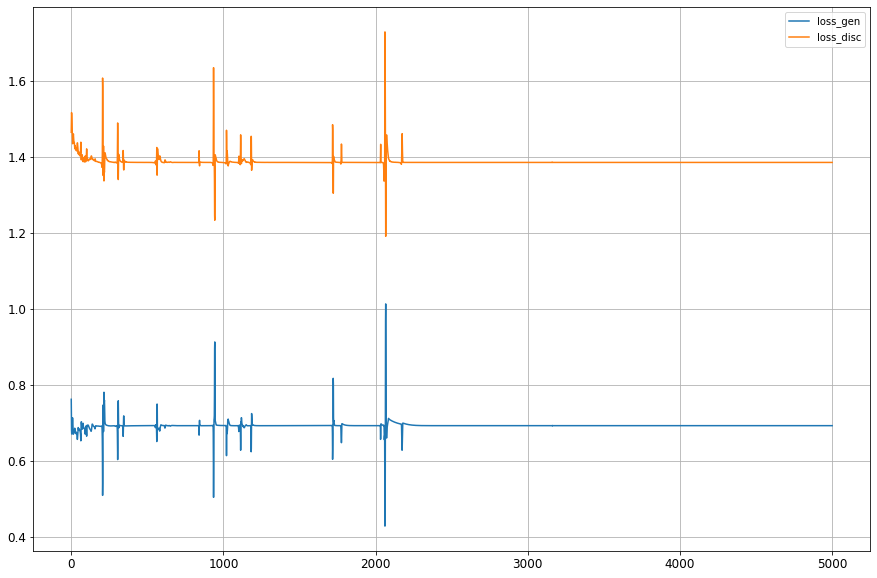

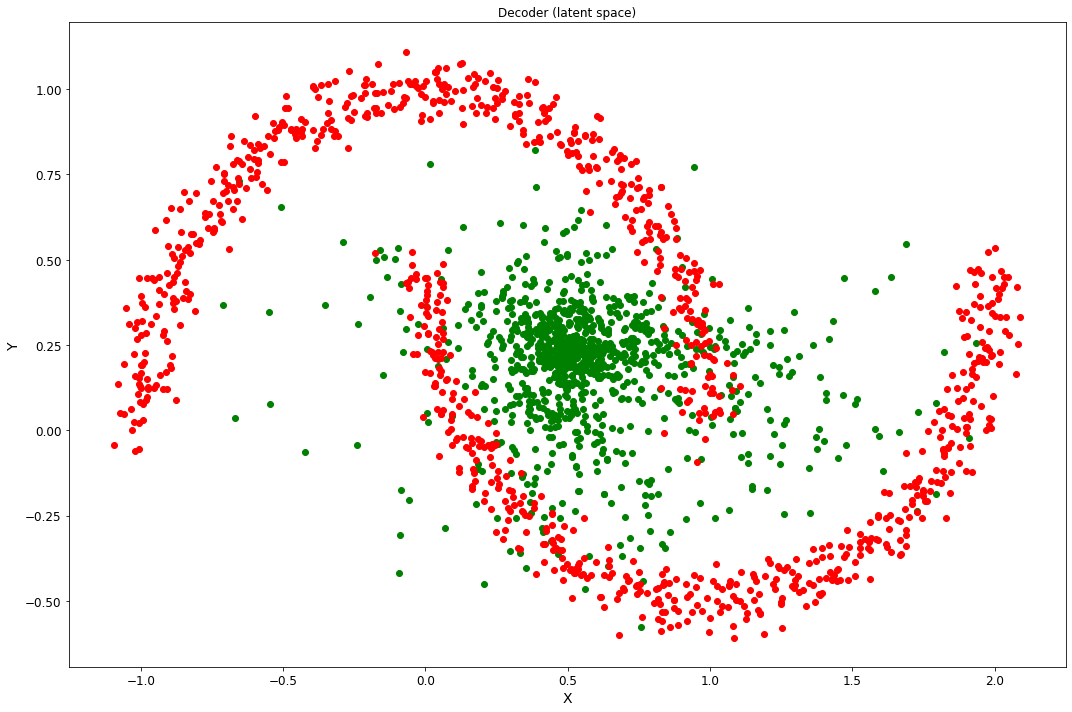

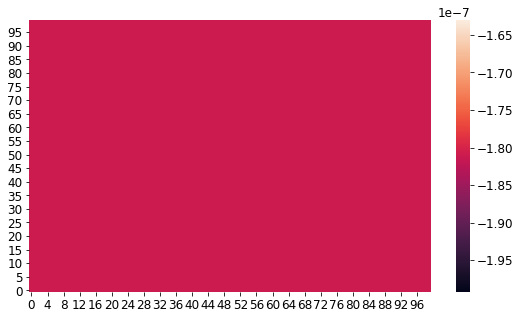

Epoch 5001/40000
Epoch 5002/40000
Epoch 5003/40000
Epoch 5004/40000
Epoch 5005/40000
Epoch 5006/40000
Epoch 5007/40000
Epoch 5008/40000
Epoch 5009/40000
Epoch 5010/40000
Epoch 5011/40000
Epoch 5012/40000
Epoch 5013/40000
Epoch 5014/40000
Epoch 5015/40000
Epoch 5016/40000
Epoch 5017/40000
Epoch 5018/40000
Epoch 5019/40000
Epoch 5020/40000
Epoch 5021/40000
Epoch 5022/40000
Epoch 5023/40000
Epoch 5024/40000
Epoch 5025/40000
Epoch 5026/40000
Epoch 5027/40000
Epoch 5028/40000
Epoch 5029/40000
Epoch 5030/40000
Epoch 5031/40000
Epoch 5032/40000
Epoch 5033/40000
Epoch 5034/40000
Epoch 5035/40000
Epoch 5036/40000
Epoch 5037/40000
Epoch 5038/40000
Epoch 5039/40000
Epoch 5040/40000
Epoch 5041/40000
Epoch 5042/40000
Epoch 5043/40000
Epoch 5044/40000
Epoch 5045/40000
Epoch 5046/40000
Epoch 5047/40000
Epoch 5048/40000
Epoch 5049/40000
Epoch 5050/40000
Epoch 5051/40000
Epoch 5052/40000
Epoch 5053/40000
Epoch 5054/40000
Epoch 5055/40000
Epoch 5056/40000
Epoch 5057/40000
Epoch 5058/40000
Epoch 5059/400

Epoch 5483/40000
Epoch 5484/40000
Epoch 5485/40000
Epoch 5486/40000
Epoch 5487/40000
Epoch 5488/40000
Epoch 5489/40000
Epoch 5490/40000
Epoch 5491/40000
Epoch 5492/40000
Epoch 5493/40000
Epoch 5494/40000
Epoch 5495/40000
Epoch 5496/40000
Epoch 5497/40000
Epoch 5498/40000
Epoch 5499/40000
Epoch 5500/40000
Epoch 5501/40000
Epoch 5502/40000
Epoch 5503/40000
Epoch 5504/40000
Epoch 5505/40000
Epoch 5506/40000
Epoch 5507/40000
Epoch 5508/40000
Epoch 5509/40000
Epoch 5510/40000
Epoch 5511/40000
Epoch 5512/40000
Epoch 5513/40000
Epoch 5514/40000
Epoch 5515/40000
Epoch 5516/40000
Epoch 5517/40000
Epoch 5518/40000
Epoch 5519/40000
Epoch 5520/40000
Epoch 5521/40000
Epoch 5522/40000
Epoch 5523/40000
Epoch 5524/40000
Epoch 5525/40000
Epoch 5526/40000
Epoch 5527/40000
Epoch 5528/40000
Epoch 5529/40000
Epoch 5530/40000
Epoch 5531/40000
Epoch 5532/40000
Epoch 5533/40000
Epoch 5534/40000
Epoch 5535/40000
Epoch 5536/40000
Epoch 5537/40000
Epoch 5538/40000
Epoch 5539/40000
Epoch 5540/40000
Epoch 5541/400

Epoch 5965/40000
Epoch 5966/40000
Epoch 5967/40000
Epoch 5968/40000
Epoch 5969/40000
Epoch 5970/40000
Epoch 5971/40000
Epoch 5972/40000
Epoch 5973/40000
Epoch 5974/40000
Epoch 5975/40000
Epoch 5976/40000
Epoch 5977/40000
Epoch 5978/40000
Epoch 5979/40000
Epoch 5980/40000
Epoch 5981/40000
Epoch 5982/40000
Epoch 5983/40000
Epoch 5984/40000
Epoch 5985/40000
Epoch 5986/40000
Epoch 5987/40000
Epoch 5988/40000
Epoch 5989/40000
Epoch 5990/40000
Epoch 5991/40000
Epoch 5992/40000
Epoch 5993/40000
Epoch 5994/40000
Epoch 5995/40000
Epoch 5996/40000
Epoch 5997/40000
Epoch 5998/40000
Epoch 5999/40000
Epoch 6000/40000
Epoch 6001/40000
Epoch 6002/40000
Epoch 6003/40000
Epoch 6004/40000
Epoch 6005/40000
Epoch 6006/40000
Epoch 6007/40000
Epoch 6008/40000
Epoch 6009/40000
Epoch 6010/40000
Epoch 6011/40000
Epoch 6012/40000
Epoch 6013/40000
Epoch 6014/40000
Epoch 6015/40000
Epoch 6016/40000
Epoch 6017/40000
Epoch 6018/40000
Epoch 6019/40000
Epoch 6020/40000
Epoch 6021/40000
Epoch 6022/40000
Epoch 6023/400

Epoch 6447/40000
Epoch 6448/40000
Epoch 6449/40000
Epoch 6450/40000
Epoch 6451/40000
Epoch 6452/40000
Epoch 6453/40000
Epoch 6454/40000
Epoch 6455/40000
Epoch 6456/40000
Epoch 6457/40000
Epoch 6458/40000
Epoch 6459/40000
Epoch 6460/40000
Epoch 6461/40000
Epoch 6462/40000
Epoch 6463/40000
Epoch 6464/40000
Epoch 6465/40000
Epoch 6466/40000
Epoch 6467/40000
Epoch 6468/40000
Epoch 6469/40000
Epoch 6470/40000
Epoch 6471/40000
Epoch 6472/40000
Epoch 6473/40000
Epoch 6474/40000
Epoch 6475/40000
Epoch 6476/40000
Epoch 6477/40000
Epoch 6478/40000
Epoch 6479/40000
Epoch 6480/40000
Epoch 6481/40000
Epoch 6482/40000
Epoch 6483/40000
Epoch 6484/40000
Epoch 6485/40000
Epoch 6486/40000
Epoch 6487/40000
Epoch 6488/40000
Epoch 6489/40000
Epoch 6490/40000
Epoch 6491/40000
Epoch 6492/40000
Epoch 6493/40000
Epoch 6494/40000
Epoch 6495/40000
Epoch 6496/40000
Epoch 6497/40000
Epoch 6498/40000
Epoch 6499/40000
Epoch 6500/40000
Epoch 6501/40000
Epoch 6502/40000
Epoch 6503/40000
Epoch 6504/40000
Epoch 6505/400

Epoch 6929/40000
Epoch 6930/40000
Epoch 6931/40000
Epoch 6932/40000
Epoch 6933/40000
Epoch 6934/40000
Epoch 6935/40000
Epoch 6936/40000
Epoch 6937/40000
Epoch 6938/40000
Epoch 6939/40000
Epoch 6940/40000
Epoch 6941/40000
Epoch 6942/40000
Epoch 6943/40000
Epoch 6944/40000
Epoch 6945/40000
Epoch 6946/40000
Epoch 6947/40000
Epoch 6948/40000
Epoch 6949/40000
Epoch 6950/40000
Epoch 6951/40000
Epoch 6952/40000
Epoch 6953/40000
Epoch 6954/40000
Epoch 6955/40000
Epoch 6956/40000
Epoch 6957/40000
Epoch 6958/40000
Epoch 6959/40000
Epoch 6960/40000
Epoch 6961/40000
Epoch 6962/40000
Epoch 6963/40000
Epoch 6964/40000
Epoch 6965/40000
Epoch 6966/40000
Epoch 6967/40000
Epoch 6968/40000
Epoch 6969/40000
Epoch 6970/40000
Epoch 6971/40000
Epoch 6972/40000
Epoch 6973/40000
Epoch 6974/40000
Epoch 6975/40000
Epoch 6976/40000
Epoch 6977/40000
Epoch 6978/40000
Epoch 6979/40000
Epoch 6980/40000
Epoch 6981/40000
Epoch 6982/40000
Epoch 6983/40000
Epoch 6984/40000
Epoch 6985/40000
Epoch 6986/40000
Epoch 6987/400

Epoch 7411/40000
Epoch 7412/40000
Epoch 7413/40000
Epoch 7414/40000
Epoch 7415/40000
Epoch 7416/40000
Epoch 7417/40000
Epoch 7418/40000
Epoch 7419/40000
Epoch 7420/40000
Epoch 7421/40000
Epoch 7422/40000
Epoch 7423/40000
Epoch 7424/40000
Epoch 7425/40000
Epoch 7426/40000
Epoch 7427/40000
Epoch 7428/40000
Epoch 7429/40000
Epoch 7430/40000
Epoch 7431/40000
Epoch 7432/40000
Epoch 7433/40000
Epoch 7434/40000
Epoch 7435/40000
Epoch 7436/40000
Epoch 7437/40000
Epoch 7438/40000
Epoch 7439/40000
Epoch 7440/40000
Epoch 7441/40000
Epoch 7442/40000
Epoch 7443/40000
Epoch 7444/40000
Epoch 7445/40000
Epoch 7446/40000
Epoch 7447/40000
Epoch 7448/40000
Epoch 7449/40000
Epoch 7450/40000
Epoch 7451/40000
Epoch 7452/40000
Epoch 7453/40000
Epoch 7454/40000
Epoch 7455/40000
Epoch 7456/40000
Epoch 7457/40000
Epoch 7458/40000
Epoch 7459/40000
Epoch 7460/40000
Epoch 7461/40000
Epoch 7462/40000
Epoch 7463/40000
Epoch 7464/40000
Epoch 7465/40000
Epoch 7466/40000
Epoch 7467/40000
Epoch 7468/40000
Epoch 7469/400

Epoch 7893/40000
Epoch 7894/40000
Epoch 7895/40000
Epoch 7896/40000
Epoch 7897/40000
Epoch 7898/40000
Epoch 7899/40000
Epoch 7900/40000
Epoch 7901/40000
Epoch 7902/40000
Epoch 7903/40000
Epoch 7904/40000
Epoch 7905/40000
Epoch 7906/40000
Epoch 7907/40000
Epoch 7908/40000
Epoch 7909/40000
Epoch 7910/40000
Epoch 7911/40000
Epoch 7912/40000
Epoch 7913/40000
Epoch 7914/40000
Epoch 7915/40000
Epoch 7916/40000
Epoch 7917/40000
Epoch 7918/40000
Epoch 7919/40000
Epoch 7920/40000
Epoch 7921/40000
Epoch 7922/40000
Epoch 7923/40000
Epoch 7924/40000
Epoch 7925/40000
Epoch 7926/40000
Epoch 7927/40000
Epoch 7928/40000
Epoch 7929/40000
Epoch 7930/40000
Epoch 7931/40000
Epoch 7932/40000
Epoch 7933/40000
Epoch 7934/40000
Epoch 7935/40000
Epoch 7936/40000
Epoch 7937/40000
Epoch 7938/40000
Epoch 7939/40000
Epoch 7940/40000
Epoch 7941/40000
Epoch 7942/40000
Epoch 7943/40000
Epoch 7944/40000
Epoch 7945/40000
Epoch 7946/40000
Epoch 7947/40000
Epoch 7948/40000
Epoch 7949/40000
Epoch 7950/40000
Epoch 7951/400

Epoch 8375/40000
Epoch 8376/40000
Epoch 8377/40000
Epoch 8378/40000
Epoch 8379/40000
Epoch 8380/40000
Epoch 8381/40000
Epoch 8382/40000
Epoch 8383/40000
Epoch 8384/40000
Epoch 8385/40000
Epoch 8386/40000
Epoch 8387/40000
Epoch 8388/40000
Epoch 8389/40000
Epoch 8390/40000
Epoch 8391/40000
Epoch 8392/40000
Epoch 8393/40000
Epoch 8394/40000
Epoch 8395/40000
Epoch 8396/40000
Epoch 8397/40000
Epoch 8398/40000
Epoch 8399/40000
Epoch 8400/40000
Epoch 8401/40000
Epoch 8402/40000
Epoch 8403/40000
Epoch 8404/40000
Epoch 8405/40000
Epoch 8406/40000
Epoch 8407/40000
Epoch 8408/40000
Epoch 8409/40000
Epoch 8410/40000
Epoch 8411/40000
Epoch 8412/40000
Epoch 8413/40000
Epoch 8414/40000
Epoch 8415/40000
Epoch 8416/40000
Epoch 8417/40000
Epoch 8418/40000
Epoch 8419/40000
Epoch 8420/40000
Epoch 8421/40000
Epoch 8422/40000
Epoch 8423/40000
Epoch 8424/40000
Epoch 8425/40000
Epoch 8426/40000
Epoch 8427/40000
Epoch 8428/40000
Epoch 8429/40000
Epoch 8430/40000
Epoch 8431/40000
Epoch 8432/40000
Epoch 8433/400

Epoch 8857/40000
Epoch 8858/40000
Epoch 8859/40000
Epoch 8860/40000
Epoch 8861/40000
Epoch 8862/40000
Epoch 8863/40000
Epoch 8864/40000
Epoch 8865/40000
Epoch 8866/40000
Epoch 8867/40000
Epoch 8868/40000
Epoch 8869/40000
Epoch 8870/40000
Epoch 8871/40000
Epoch 8872/40000
Epoch 8873/40000
Epoch 8874/40000
Epoch 8875/40000
Epoch 8876/40000
Epoch 8877/40000
Epoch 8878/40000
Epoch 8879/40000
Epoch 8880/40000
Epoch 8881/40000
Epoch 8882/40000
Epoch 8883/40000
Epoch 8884/40000
Epoch 8885/40000
Epoch 8886/40000
Epoch 8887/40000
Epoch 8888/40000
Epoch 8889/40000
Epoch 8890/40000
Epoch 8891/40000
Epoch 8892/40000
Epoch 8893/40000
Epoch 8894/40000
Epoch 8895/40000
Epoch 8896/40000
Epoch 8897/40000
Epoch 8898/40000
Epoch 8899/40000
Epoch 8900/40000
Epoch 8901/40000
Epoch 8902/40000
Epoch 8903/40000
Epoch 8904/40000
Epoch 8905/40000
Epoch 8906/40000
Epoch 8907/40000
Epoch 8908/40000
Epoch 8909/40000
Epoch 8910/40000
Epoch 8911/40000
Epoch 8912/40000
Epoch 8913/40000
Epoch 8914/40000
Epoch 8915/400

Epoch 9339/40000
Epoch 9340/40000
Epoch 9341/40000
Epoch 9342/40000
Epoch 9343/40000
Epoch 9344/40000
Epoch 9345/40000
Epoch 9346/40000
Epoch 9347/40000
Epoch 9348/40000
Epoch 9349/40000
Epoch 9350/40000
Epoch 9351/40000
Epoch 9352/40000
Epoch 9353/40000
Epoch 9354/40000
Epoch 9355/40000
Epoch 9356/40000
Epoch 9357/40000
Epoch 9358/40000
Epoch 9359/40000
Epoch 9360/40000
Epoch 9361/40000
Epoch 9362/40000
Epoch 9363/40000
Epoch 9364/40000
Epoch 9365/40000
Epoch 9366/40000
Epoch 9367/40000
Epoch 9368/40000
Epoch 9369/40000
Epoch 9370/40000
Epoch 9371/40000
Epoch 9372/40000
Epoch 9373/40000
Epoch 9374/40000
Epoch 9375/40000
Epoch 9376/40000
Epoch 9377/40000
Epoch 9378/40000
Epoch 9379/40000
Epoch 9380/40000
Epoch 9381/40000
Epoch 9382/40000
Epoch 9383/40000
Epoch 9384/40000
Epoch 9385/40000
Epoch 9386/40000
Epoch 9387/40000
Epoch 9388/40000
Epoch 9389/40000
Epoch 9390/40000
Epoch 9391/40000
Epoch 9392/40000
Epoch 9393/40000
Epoch 9394/40000
Epoch 9395/40000
Epoch 9396/40000
Epoch 9397/400

Epoch 9821/40000
Epoch 9822/40000
Epoch 9823/40000
Epoch 9824/40000
Epoch 9825/40000
Epoch 9826/40000
Epoch 9827/40000
Epoch 9828/40000
Epoch 9829/40000
Epoch 9830/40000
Epoch 9831/40000
Epoch 9832/40000
Epoch 9833/40000
Epoch 9834/40000
Epoch 9835/40000
Epoch 9836/40000
Epoch 9837/40000
Epoch 9838/40000
Epoch 9839/40000
Epoch 9840/40000
Epoch 9841/40000
Epoch 9842/40000
Epoch 9843/40000
Epoch 9844/40000
Epoch 9845/40000
Epoch 9846/40000
Epoch 9847/40000
Epoch 9848/40000
Epoch 9849/40000
Epoch 9850/40000
Epoch 9851/40000
Epoch 9852/40000
Epoch 9853/40000
Epoch 9854/40000
Epoch 9855/40000
Epoch 9856/40000
Epoch 9857/40000
Epoch 9858/40000
Epoch 9859/40000
Epoch 9860/40000
Epoch 9861/40000
Epoch 9862/40000
Epoch 9863/40000
Epoch 9864/40000
Epoch 9865/40000
Epoch 9866/40000
Epoch 9867/40000
Epoch 9868/40000
Epoch 9869/40000
Epoch 9870/40000
Epoch 9871/40000
Epoch 9872/40000
Epoch 9873/40000
Epoch 9874/40000
Epoch 9875/40000
Epoch 9876/40000
Epoch 9877/40000
Epoch 9878/40000
Epoch 9879/400

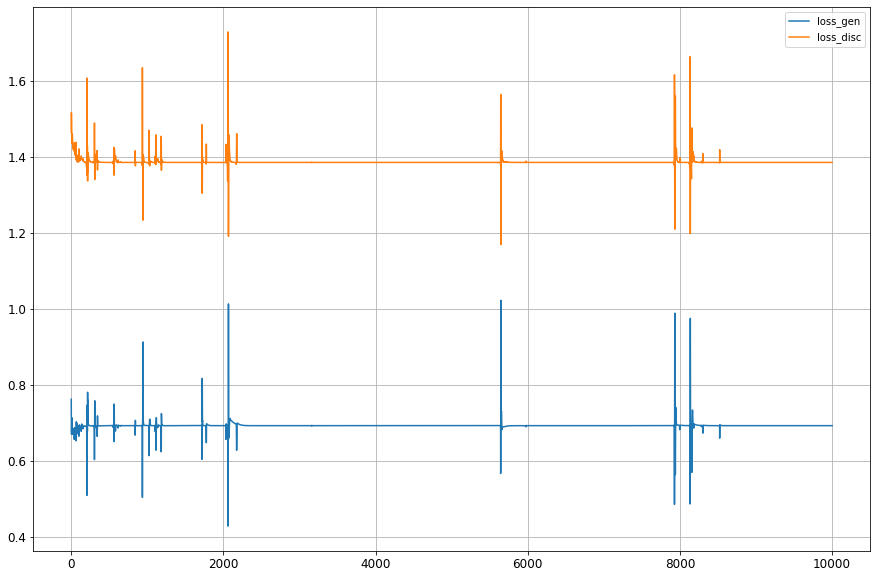

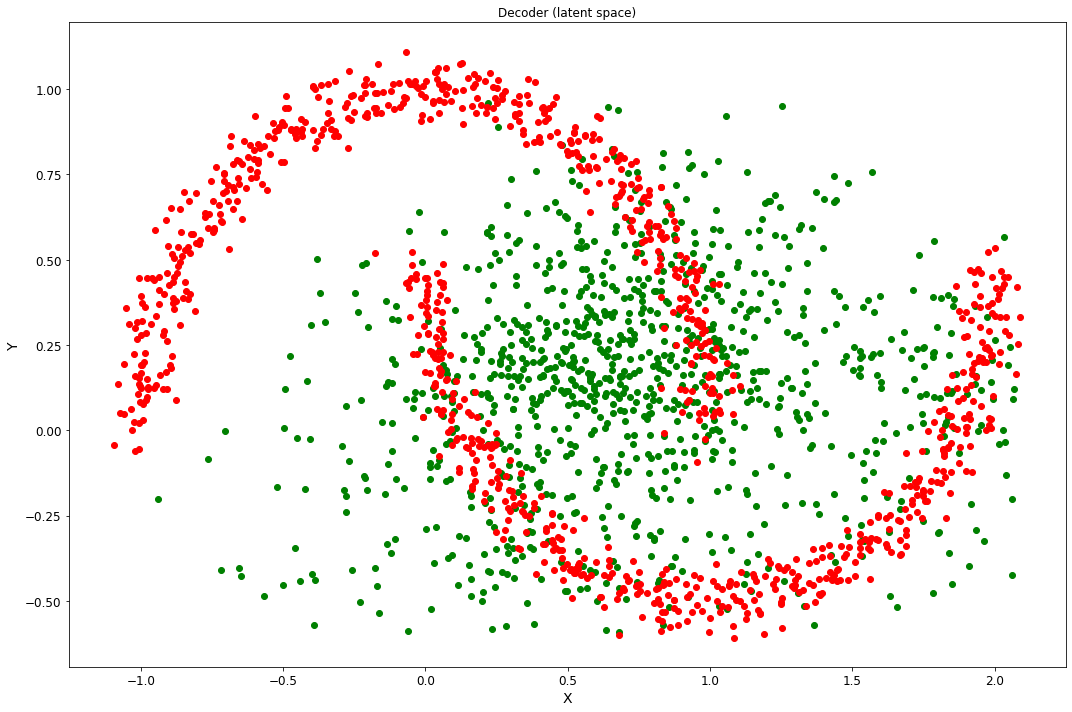

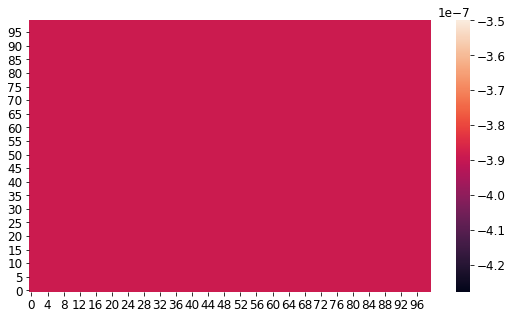

Epoch 10001/40000
Epoch 10002/40000
Epoch 10003/40000
Epoch 10004/40000
Epoch 10005/40000
Epoch 10006/40000
Epoch 10007/40000
Epoch 10008/40000
Epoch 10009/40000
Epoch 10010/40000
Epoch 10011/40000
Epoch 10012/40000
Epoch 10013/40000
Epoch 10014/40000
Epoch 10015/40000
Epoch 10016/40000
Epoch 10017/40000
Epoch 10018/40000
Epoch 10019/40000
Epoch 10020/40000
Epoch 10021/40000
Epoch 10022/40000
Epoch 10023/40000
Epoch 10024/40000
Epoch 10025/40000
Epoch 10026/40000
Epoch 10027/40000
Epoch 10028/40000
Epoch 10029/40000
Epoch 10030/40000
Epoch 10031/40000
Epoch 10032/40000
Epoch 10033/40000
Epoch 10034/40000
Epoch 10035/40000
Epoch 10036/40000
Epoch 10037/40000
Epoch 10038/40000
Epoch 10039/40000
Epoch 10040/40000
Epoch 10041/40000
Epoch 10042/40000
Epoch 10043/40000
Epoch 10044/40000
Epoch 10045/40000
Epoch 10046/40000
Epoch 10047/40000
Epoch 10048/40000
Epoch 10049/40000
Epoch 10050/40000
Epoch 10051/40000
Epoch 10052/40000
Epoch 10053/40000
Epoch 10054/40000
Epoch 10055/40000
Epoch 1005

Epoch 10457/40000
Epoch 10458/40000
Epoch 10459/40000
Epoch 10460/40000
Epoch 10461/40000
Epoch 10462/40000
Epoch 10463/40000
Epoch 10464/40000
Epoch 10465/40000
Epoch 10466/40000
Epoch 10467/40000
Epoch 10468/40000
Epoch 10469/40000
Epoch 10470/40000
Epoch 10471/40000
Epoch 10472/40000
Epoch 10473/40000
Epoch 10474/40000
Epoch 10475/40000
Epoch 10476/40000
Epoch 10477/40000
Epoch 10478/40000
Epoch 10479/40000
Epoch 10480/40000
Epoch 10481/40000
Epoch 10482/40000
Epoch 10483/40000
Epoch 10484/40000
Epoch 10485/40000
Epoch 10486/40000
Epoch 10487/40000
Epoch 10488/40000
Epoch 10489/40000
Epoch 10490/40000
Epoch 10491/40000
Epoch 10492/40000
Epoch 10493/40000
Epoch 10494/40000
Epoch 10495/40000
Epoch 10496/40000
Epoch 10497/40000
Epoch 10498/40000
Epoch 10499/40000
Epoch 10500/40000
Epoch 10501/40000
Epoch 10502/40000
Epoch 10503/40000
Epoch 10504/40000
Epoch 10505/40000
Epoch 10506/40000
Epoch 10507/40000
Epoch 10508/40000
Epoch 10509/40000
Epoch 10510/40000
Epoch 10511/40000
Epoch 1051

Epoch 10913/40000
Epoch 10914/40000
Epoch 10915/40000
Epoch 10916/40000
Epoch 10917/40000
Epoch 10918/40000
Epoch 10919/40000
Epoch 10920/40000
Epoch 10921/40000
Epoch 10922/40000
Epoch 10923/40000
Epoch 10924/40000
Epoch 10925/40000
Epoch 10926/40000
Epoch 10927/40000
Epoch 10928/40000
Epoch 10929/40000
Epoch 10930/40000
Epoch 10931/40000
Epoch 10932/40000
Epoch 10933/40000
Epoch 10934/40000
Epoch 10935/40000
Epoch 10936/40000
Epoch 10937/40000
Epoch 10938/40000
Epoch 10939/40000
Epoch 10940/40000
Epoch 10941/40000
Epoch 10942/40000
Epoch 10943/40000
Epoch 10944/40000
Epoch 10945/40000
Epoch 10946/40000
Epoch 10947/40000
Epoch 10948/40000
Epoch 10949/40000
Epoch 10950/40000
Epoch 10951/40000
Epoch 10952/40000
Epoch 10953/40000
Epoch 10954/40000
Epoch 10955/40000
Epoch 10956/40000
Epoch 10957/40000
Epoch 10958/40000
Epoch 10959/40000
Epoch 10960/40000
Epoch 10961/40000
Epoch 10962/40000
Epoch 10963/40000
Epoch 10964/40000
Epoch 10965/40000
Epoch 10966/40000
Epoch 10967/40000
Epoch 1096

Epoch 11369/40000
Epoch 11370/40000
Epoch 11371/40000
Epoch 11372/40000
Epoch 11373/40000
Epoch 11374/40000
Epoch 11375/40000
Epoch 11376/40000
Epoch 11377/40000
Epoch 11378/40000
Epoch 11379/40000
Epoch 11380/40000
Epoch 11381/40000
Epoch 11382/40000
Epoch 11383/40000
Epoch 11384/40000
Epoch 11385/40000
Epoch 11386/40000
Epoch 11387/40000
Epoch 11388/40000
Epoch 11389/40000
Epoch 11390/40000
Epoch 11391/40000
Epoch 11392/40000
Epoch 11393/40000
Epoch 11394/40000
Epoch 11395/40000
Epoch 11396/40000
Epoch 11397/40000
Epoch 11398/40000
Epoch 11399/40000
Epoch 11400/40000
Epoch 11401/40000
Epoch 11402/40000
Epoch 11403/40000
Epoch 11404/40000
Epoch 11405/40000
Epoch 11406/40000
Epoch 11407/40000
Epoch 11408/40000
Epoch 11409/40000
Epoch 11410/40000
Epoch 11411/40000
Epoch 11412/40000
Epoch 11413/40000
Epoch 11414/40000
Epoch 11415/40000
Epoch 11416/40000
Epoch 11417/40000
Epoch 11418/40000
Epoch 11419/40000
Epoch 11420/40000
Epoch 11421/40000
Epoch 11422/40000
Epoch 11423/40000
Epoch 1142

Epoch 11825/40000
Epoch 11826/40000
Epoch 11827/40000
Epoch 11828/40000
Epoch 11829/40000
Epoch 11830/40000
Epoch 11831/40000
Epoch 11832/40000
Epoch 11833/40000
Epoch 11834/40000
Epoch 11835/40000
Epoch 11836/40000
Epoch 11837/40000
Epoch 11838/40000
Epoch 11839/40000
Epoch 11840/40000
Epoch 11841/40000
Epoch 11842/40000
Epoch 11843/40000
Epoch 11844/40000
Epoch 11845/40000
Epoch 11846/40000
Epoch 11847/40000
Epoch 11848/40000
Epoch 11849/40000
Epoch 11850/40000
Epoch 11851/40000
Epoch 11852/40000
Epoch 11853/40000
Epoch 11854/40000
Epoch 11855/40000
Epoch 11856/40000
Epoch 11857/40000
Epoch 11858/40000
Epoch 11859/40000
Epoch 11860/40000
Epoch 11861/40000
Epoch 11862/40000
Epoch 11863/40000
Epoch 11864/40000
Epoch 11865/40000
Epoch 11866/40000
Epoch 11867/40000
Epoch 11868/40000
Epoch 11869/40000
Epoch 11870/40000
Epoch 11871/40000
Epoch 11872/40000
Epoch 11873/40000
Epoch 11874/40000
Epoch 11875/40000
Epoch 11876/40000
Epoch 11877/40000
Epoch 11878/40000
Epoch 11879/40000
Epoch 1188

Epoch 12281/40000
Epoch 12282/40000
Epoch 12283/40000
Epoch 12284/40000
Epoch 12285/40000
Epoch 12286/40000
Epoch 12287/40000
Epoch 12288/40000
Epoch 12289/40000
Epoch 12290/40000
Epoch 12291/40000
Epoch 12292/40000
Epoch 12293/40000
Epoch 12294/40000
Epoch 12295/40000
Epoch 12296/40000
Epoch 12297/40000
Epoch 12298/40000
Epoch 12299/40000
Epoch 12300/40000
Epoch 12301/40000
Epoch 12302/40000
Epoch 12303/40000
Epoch 12304/40000
Epoch 12305/40000
Epoch 12306/40000
Epoch 12307/40000
Epoch 12308/40000
Epoch 12309/40000
Epoch 12310/40000
Epoch 12311/40000
Epoch 12312/40000
Epoch 12313/40000
Epoch 12314/40000
Epoch 12315/40000
Epoch 12316/40000
Epoch 12317/40000
Epoch 12318/40000
Epoch 12319/40000
Epoch 12320/40000
Epoch 12321/40000
Epoch 12322/40000
Epoch 12323/40000
Epoch 12324/40000
Epoch 12325/40000
Epoch 12326/40000
Epoch 12327/40000
Epoch 12328/40000
Epoch 12329/40000
Epoch 12330/40000
Epoch 12331/40000
Epoch 12332/40000
Epoch 12333/40000
Epoch 12334/40000
Epoch 12335/40000
Epoch 1233

Epoch 12737/40000
Epoch 12738/40000
Epoch 12739/40000
Epoch 12740/40000
Epoch 12741/40000
Epoch 12742/40000
Epoch 12743/40000
Epoch 12744/40000
Epoch 12745/40000
Epoch 12746/40000
Epoch 12747/40000
Epoch 12748/40000
Epoch 12749/40000
Epoch 12750/40000
Epoch 12751/40000
Epoch 12752/40000
Epoch 12753/40000
Epoch 12754/40000
Epoch 12755/40000
Epoch 12756/40000
Epoch 12757/40000
Epoch 12758/40000
Epoch 12759/40000
Epoch 12760/40000
Epoch 12761/40000
Epoch 12762/40000
Epoch 12763/40000
Epoch 12764/40000
Epoch 12765/40000
Epoch 12766/40000
Epoch 12767/40000
Epoch 12768/40000
Epoch 12769/40000
Epoch 12770/40000
Epoch 12771/40000
Epoch 12772/40000
Epoch 12773/40000
Epoch 12774/40000
Epoch 12775/40000
Epoch 12776/40000
Epoch 12777/40000
Epoch 12778/40000
Epoch 12779/40000
Epoch 12780/40000
Epoch 12781/40000
Epoch 12782/40000
Epoch 12783/40000
Epoch 12784/40000
Epoch 12785/40000
Epoch 12786/40000
Epoch 12787/40000
Epoch 12788/40000
Epoch 12789/40000
Epoch 12790/40000
Epoch 12791/40000
Epoch 1279

Epoch 13193/40000
Epoch 13194/40000
Epoch 13195/40000
Epoch 13196/40000
Epoch 13197/40000
Epoch 13198/40000
Epoch 13199/40000
Epoch 13200/40000
Epoch 13201/40000
Epoch 13202/40000
Epoch 13203/40000
Epoch 13204/40000
Epoch 13205/40000
Epoch 13206/40000
Epoch 13207/40000
Epoch 13208/40000
Epoch 13209/40000
Epoch 13210/40000
Epoch 13211/40000
Epoch 13212/40000
Epoch 13213/40000
Epoch 13214/40000
Epoch 13215/40000
Epoch 13216/40000
Epoch 13217/40000
Epoch 13218/40000
Epoch 13219/40000
Epoch 13220/40000
Epoch 13221/40000
Epoch 13222/40000
Epoch 13223/40000
Epoch 13224/40000
Epoch 13225/40000
Epoch 13226/40000
Epoch 13227/40000
Epoch 13228/40000
Epoch 13229/40000
Epoch 13230/40000
Epoch 13231/40000
Epoch 13232/40000
Epoch 13233/40000
Epoch 13234/40000
Epoch 13235/40000
Epoch 13236/40000
Epoch 13237/40000
Epoch 13238/40000
Epoch 13239/40000
Epoch 13240/40000
Epoch 13241/40000
Epoch 13242/40000
Epoch 13243/40000
Epoch 13244/40000
Epoch 13245/40000
Epoch 13246/40000
Epoch 13247/40000
Epoch 1324

Epoch 13649/40000
Epoch 13650/40000
Epoch 13651/40000
Epoch 13652/40000
Epoch 13653/40000
Epoch 13654/40000
Epoch 13655/40000
Epoch 13656/40000
Epoch 13657/40000
Epoch 13658/40000
Epoch 13659/40000
Epoch 13660/40000
Epoch 13661/40000
Epoch 13662/40000
Epoch 13663/40000
Epoch 13664/40000
Epoch 13665/40000
Epoch 13666/40000
Epoch 13667/40000
Epoch 13668/40000
Epoch 13669/40000
Epoch 13670/40000
Epoch 13671/40000
Epoch 13672/40000
Epoch 13673/40000
Epoch 13674/40000
Epoch 13675/40000
Epoch 13676/40000
Epoch 13677/40000
Epoch 13678/40000
Epoch 13679/40000
Epoch 13680/40000
Epoch 13681/40000
Epoch 13682/40000
Epoch 13683/40000
Epoch 13684/40000
Epoch 13685/40000
Epoch 13686/40000
Epoch 13687/40000
Epoch 13688/40000
Epoch 13689/40000
Epoch 13690/40000
Epoch 13691/40000
Epoch 13692/40000
Epoch 13693/40000
Epoch 13694/40000
Epoch 13695/40000
Epoch 13696/40000
Epoch 13697/40000
Epoch 13698/40000
Epoch 13699/40000
Epoch 13700/40000
Epoch 13701/40000
Epoch 13702/40000
Epoch 13703/40000
Epoch 1370

Epoch 14105/40000
Epoch 14106/40000
Epoch 14107/40000
Epoch 14108/40000
Epoch 14109/40000
Epoch 14110/40000
Epoch 14111/40000
Epoch 14112/40000
Epoch 14113/40000
Epoch 14114/40000
Epoch 14115/40000
Epoch 14116/40000
Epoch 14117/40000
Epoch 14118/40000
Epoch 14119/40000
Epoch 14120/40000
Epoch 14121/40000
Epoch 14122/40000
Epoch 14123/40000
Epoch 14124/40000
Epoch 14125/40000
Epoch 14126/40000
Epoch 14127/40000
Epoch 14128/40000
Epoch 14129/40000
Epoch 14130/40000
Epoch 14131/40000
Epoch 14132/40000
Epoch 14133/40000
Epoch 14134/40000
Epoch 14135/40000
Epoch 14136/40000
Epoch 14137/40000
Epoch 14138/40000
Epoch 14139/40000
Epoch 14140/40000
Epoch 14141/40000
Epoch 14142/40000
Epoch 14143/40000
Epoch 14144/40000
Epoch 14145/40000
Epoch 14146/40000
Epoch 14147/40000
Epoch 14148/40000
Epoch 14149/40000
Epoch 14150/40000
Epoch 14151/40000
Epoch 14152/40000
Epoch 14153/40000
Epoch 14154/40000
Epoch 14155/40000
Epoch 14156/40000
Epoch 14157/40000
Epoch 14158/40000
Epoch 14159/40000
Epoch 1416

Epoch 14561/40000
Epoch 14562/40000
Epoch 14563/40000
Epoch 14564/40000
Epoch 14565/40000
Epoch 14566/40000
Epoch 14567/40000
Epoch 14568/40000
Epoch 14569/40000
Epoch 14570/40000
Epoch 14571/40000
Epoch 14572/40000
Epoch 14573/40000
Epoch 14574/40000
Epoch 14575/40000
Epoch 14576/40000
Epoch 14577/40000
Epoch 14578/40000
Epoch 14579/40000
Epoch 14580/40000
Epoch 14581/40000
Epoch 14582/40000
Epoch 14583/40000
Epoch 14584/40000
Epoch 14585/40000
Epoch 14586/40000
Epoch 14587/40000
Epoch 14588/40000
Epoch 14589/40000
Epoch 14590/40000
Epoch 14591/40000
Epoch 14592/40000
Epoch 14593/40000
Epoch 14594/40000
Epoch 14595/40000
Epoch 14596/40000
Epoch 14597/40000
Epoch 14598/40000
Epoch 14599/40000
Epoch 14600/40000
Epoch 14601/40000
Epoch 14602/40000
Epoch 14603/40000
Epoch 14604/40000
Epoch 14605/40000
Epoch 14606/40000
Epoch 14607/40000
Epoch 14608/40000
Epoch 14609/40000
Epoch 14610/40000
Epoch 14611/40000
Epoch 14612/40000
Epoch 14613/40000
Epoch 14614/40000
Epoch 14615/40000
Epoch 1461

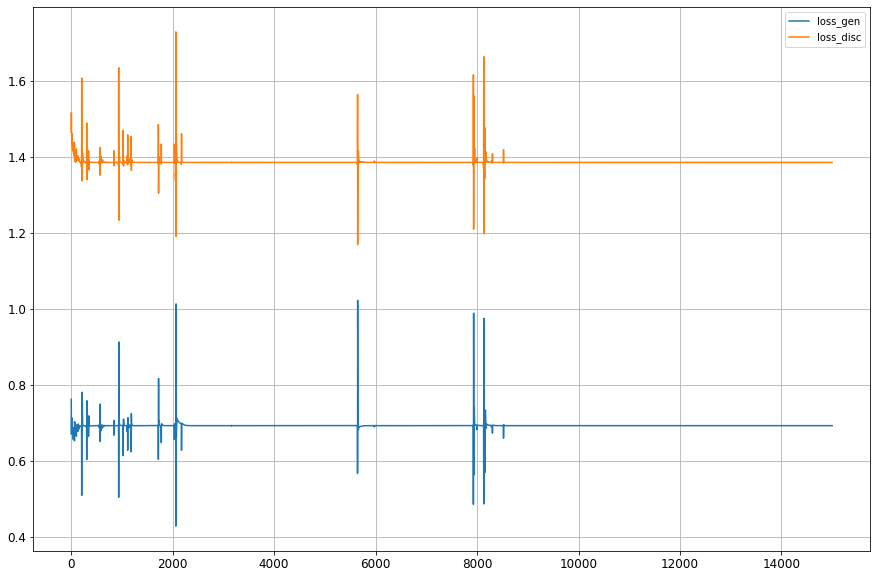

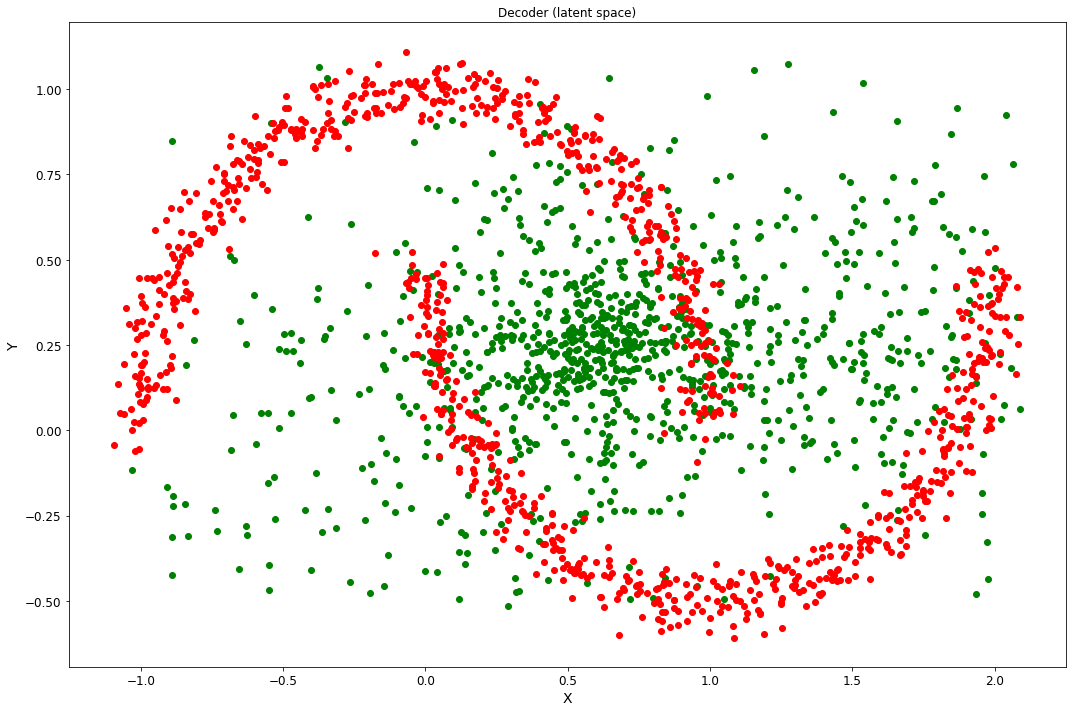

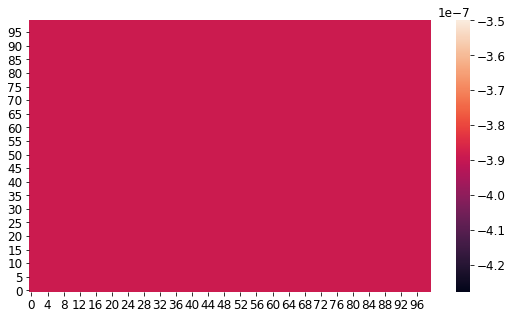

Epoch 15001/40000
Epoch 15002/40000
Epoch 15003/40000
Epoch 15004/40000
Epoch 15005/40000
Epoch 15006/40000
Epoch 15007/40000
Epoch 15008/40000
Epoch 15009/40000
Epoch 15010/40000
Epoch 15011/40000
Epoch 15012/40000
Epoch 15013/40000
Epoch 15014/40000
Epoch 15015/40000
Epoch 15016/40000
Epoch 15017/40000
Epoch 15018/40000
Epoch 15019/40000
Epoch 15020/40000
Epoch 15021/40000
Epoch 15022/40000
Epoch 15023/40000
Epoch 15024/40000
Epoch 15025/40000
Epoch 15026/40000
Epoch 15027/40000
Epoch 15028/40000
Epoch 15029/40000
Epoch 15030/40000
Epoch 15031/40000
Epoch 15032/40000
Epoch 15033/40000
Epoch 15034/40000
Epoch 15035/40000
Epoch 15036/40000
Epoch 15037/40000
Epoch 15038/40000
Epoch 15039/40000
Epoch 15040/40000
Epoch 15041/40000
Epoch 15042/40000
Epoch 15043/40000
Epoch 15044/40000
Epoch 15045/40000
Epoch 15046/40000
Epoch 15047/40000
Epoch 15048/40000
Epoch 15049/40000
Epoch 15050/40000
Epoch 15051/40000
Epoch 15052/40000
Epoch 15053/40000
Epoch 15054/40000
Epoch 15055/40000
Epoch 1505

Epoch 15457/40000
Epoch 15458/40000
Epoch 15459/40000
Epoch 15460/40000
Epoch 15461/40000
Epoch 15462/40000
Epoch 15463/40000
Epoch 15464/40000
Epoch 15465/40000
Epoch 15466/40000
Epoch 15467/40000
Epoch 15468/40000
Epoch 15469/40000
Epoch 15470/40000
Epoch 15471/40000
Epoch 15472/40000
Epoch 15473/40000
Epoch 15474/40000
Epoch 15475/40000
Epoch 15476/40000
Epoch 15477/40000
Epoch 15478/40000
Epoch 15479/40000
Epoch 15480/40000
Epoch 15481/40000
Epoch 15482/40000
Epoch 15483/40000
Epoch 15484/40000
Epoch 15485/40000
Epoch 15486/40000
Epoch 15487/40000
Epoch 15488/40000
Epoch 15489/40000
Epoch 15490/40000
Epoch 15491/40000
Epoch 15492/40000
Epoch 15493/40000
Epoch 15494/40000
Epoch 15495/40000
Epoch 15496/40000
Epoch 15497/40000
Epoch 15498/40000
Epoch 15499/40000
Epoch 15500/40000
Epoch 15501/40000
Epoch 15502/40000
Epoch 15503/40000
Epoch 15504/40000
Epoch 15505/40000
Epoch 15506/40000
Epoch 15507/40000
Epoch 15508/40000
Epoch 15509/40000
Epoch 15510/40000
Epoch 15511/40000
Epoch 1551

Epoch 15913/40000
Epoch 15914/40000
Epoch 15915/40000
Epoch 15916/40000
Epoch 15917/40000
Epoch 15918/40000
Epoch 15919/40000
Epoch 15920/40000
Epoch 15921/40000
Epoch 15922/40000
Epoch 15923/40000
Epoch 15924/40000
Epoch 15925/40000
Epoch 15926/40000
Epoch 15927/40000
Epoch 15928/40000
Epoch 15929/40000
Epoch 15930/40000
Epoch 15931/40000
Epoch 15932/40000
Epoch 15933/40000
Epoch 15934/40000
Epoch 15935/40000
Epoch 15936/40000
Epoch 15937/40000
Epoch 15938/40000
Epoch 15939/40000
Epoch 15940/40000
Epoch 15941/40000
Epoch 15942/40000
Epoch 15943/40000
Epoch 15944/40000
Epoch 15945/40000
Epoch 15946/40000
Epoch 15947/40000
Epoch 15948/40000
Epoch 15949/40000
Epoch 15950/40000
Epoch 15951/40000
Epoch 15952/40000
Epoch 15953/40000
Epoch 15954/40000
Epoch 15955/40000
Epoch 15956/40000
Epoch 15957/40000
Epoch 15958/40000
Epoch 15959/40000
Epoch 15960/40000
Epoch 15961/40000
Epoch 15962/40000
Epoch 15963/40000
Epoch 15964/40000
Epoch 15965/40000
Epoch 15966/40000
Epoch 15967/40000
Epoch 1596

Epoch 16369/40000
Epoch 16370/40000
Epoch 16371/40000
Epoch 16372/40000
Epoch 16373/40000
Epoch 16374/40000
Epoch 16375/40000
Epoch 16376/40000
Epoch 16377/40000
Epoch 16378/40000
Epoch 16379/40000
Epoch 16380/40000
Epoch 16381/40000
Epoch 16382/40000
Epoch 16383/40000
Epoch 16384/40000
Epoch 16385/40000
Epoch 16386/40000
Epoch 16387/40000
Epoch 16388/40000
Epoch 16389/40000
Epoch 16390/40000
Epoch 16391/40000
Epoch 16392/40000
Epoch 16393/40000
Epoch 16394/40000
Epoch 16395/40000
Epoch 16396/40000
Epoch 16397/40000
Epoch 16398/40000
Epoch 16399/40000
Epoch 16400/40000
Epoch 16401/40000
Epoch 16402/40000
Epoch 16403/40000
Epoch 16404/40000
Epoch 16405/40000
Epoch 16406/40000
Epoch 16407/40000
Epoch 16408/40000
Epoch 16409/40000
Epoch 16410/40000
Epoch 16411/40000
Epoch 16412/40000
Epoch 16413/40000
Epoch 16414/40000
Epoch 16415/40000
Epoch 16416/40000
Epoch 16417/40000
Epoch 16418/40000
Epoch 16419/40000
Epoch 16420/40000
Epoch 16421/40000
Epoch 16422/40000
Epoch 16423/40000
Epoch 1642

Epoch 16825/40000
Epoch 16826/40000
Epoch 16827/40000
Epoch 16828/40000
Epoch 16829/40000
Epoch 16830/40000
Epoch 16831/40000
Epoch 16832/40000
Epoch 16833/40000
Epoch 16834/40000
Epoch 16835/40000
Epoch 16836/40000
Epoch 16837/40000
Epoch 16838/40000
Epoch 16839/40000
Epoch 16840/40000
Epoch 16841/40000
Epoch 16842/40000
Epoch 16843/40000
Epoch 16844/40000
Epoch 16845/40000
Epoch 16846/40000
Epoch 16847/40000
Epoch 16848/40000
Epoch 16849/40000
Epoch 16850/40000
Epoch 16851/40000
Epoch 16852/40000
Epoch 16853/40000
Epoch 16854/40000
Epoch 16855/40000
Epoch 16856/40000
Epoch 16857/40000
Epoch 16858/40000
Epoch 16859/40000
Epoch 16860/40000
Epoch 16861/40000
Epoch 16862/40000
Epoch 16863/40000
Epoch 16864/40000
Epoch 16865/40000
Epoch 16866/40000
Epoch 16867/40000
Epoch 16868/40000
Epoch 16869/40000
Epoch 16870/40000
Epoch 16871/40000
Epoch 16872/40000
Epoch 16873/40000
Epoch 16874/40000
Epoch 16875/40000
Epoch 16876/40000
Epoch 16877/40000
Epoch 16878/40000
Epoch 16879/40000
Epoch 1688

Epoch 17281/40000
Epoch 17282/40000
Epoch 17283/40000
Epoch 17284/40000
Epoch 17285/40000
Epoch 17286/40000
Epoch 17287/40000
Epoch 17288/40000
Epoch 17289/40000
Epoch 17290/40000
Epoch 17291/40000
Epoch 17292/40000
Epoch 17293/40000
Epoch 17294/40000
Epoch 17295/40000
Epoch 17296/40000
Epoch 17297/40000
Epoch 17298/40000
Epoch 17299/40000
Epoch 17300/40000
Epoch 17301/40000
Epoch 17302/40000
Epoch 17303/40000
Epoch 17304/40000
Epoch 17305/40000
Epoch 17306/40000
Epoch 17307/40000
Epoch 17308/40000
Epoch 17309/40000
Epoch 17310/40000
Epoch 17311/40000
Epoch 17312/40000
Epoch 17313/40000
Epoch 17314/40000
Epoch 17315/40000
Epoch 17316/40000
Epoch 17317/40000
Epoch 17318/40000
Epoch 17319/40000
Epoch 17320/40000
Epoch 17321/40000
Epoch 17322/40000
Epoch 17323/40000
Epoch 17324/40000
Epoch 17325/40000
Epoch 17326/40000
Epoch 17327/40000
Epoch 17328/40000
Epoch 17329/40000
Epoch 17330/40000
Epoch 17331/40000
Epoch 17332/40000
Epoch 17333/40000
Epoch 17334/40000
Epoch 17335/40000
Epoch 1733

Epoch 17737/40000
Epoch 17738/40000
Epoch 17739/40000
Epoch 17740/40000
Epoch 17741/40000
Epoch 17742/40000
Epoch 17743/40000
Epoch 17744/40000
Epoch 17745/40000
Epoch 17746/40000
Epoch 17747/40000
Epoch 17748/40000
Epoch 17749/40000
Epoch 17750/40000
Epoch 17751/40000
Epoch 17752/40000
Epoch 17753/40000
Epoch 17754/40000
Epoch 17755/40000
Epoch 17756/40000
Epoch 17757/40000
Epoch 17758/40000
Epoch 17759/40000
Epoch 17760/40000
Epoch 17761/40000
Epoch 17762/40000
Epoch 17763/40000
Epoch 17764/40000
Epoch 17765/40000
Epoch 17766/40000
Epoch 17767/40000
Epoch 17768/40000
Epoch 17769/40000
Epoch 17770/40000
Epoch 17771/40000
Epoch 17772/40000
Epoch 17773/40000
Epoch 17774/40000
Epoch 17775/40000
Epoch 17776/40000
Epoch 17777/40000
Epoch 17778/40000
Epoch 17779/40000
Epoch 17780/40000
Epoch 17781/40000
Epoch 17782/40000
Epoch 17783/40000
Epoch 17784/40000
Epoch 17785/40000
Epoch 17786/40000
Epoch 17787/40000
Epoch 17788/40000
Epoch 17789/40000
Epoch 17790/40000
Epoch 17791/40000
Epoch 1779

Epoch 18193/40000
Epoch 18194/40000
Epoch 18195/40000
Epoch 18196/40000
Epoch 18197/40000
Epoch 18198/40000
Epoch 18199/40000
Epoch 18200/40000
Epoch 18201/40000
Epoch 18202/40000
Epoch 18203/40000
Epoch 18204/40000
Epoch 18205/40000
Epoch 18206/40000
Epoch 18207/40000
Epoch 18208/40000
Epoch 18209/40000
Epoch 18210/40000
Epoch 18211/40000
Epoch 18212/40000
Epoch 18213/40000
Epoch 18214/40000
Epoch 18215/40000
Epoch 18216/40000
Epoch 18217/40000
Epoch 18218/40000
Epoch 18219/40000
Epoch 18220/40000
Epoch 18221/40000
Epoch 18222/40000
Epoch 18223/40000
Epoch 18224/40000
Epoch 18225/40000
Epoch 18226/40000
Epoch 18227/40000
Epoch 18228/40000
Epoch 18229/40000
Epoch 18230/40000
Epoch 18231/40000
Epoch 18232/40000
Epoch 18233/40000
Epoch 18234/40000
Epoch 18235/40000
Epoch 18236/40000
Epoch 18237/40000
Epoch 18238/40000
Epoch 18239/40000
Epoch 18240/40000
Epoch 18241/40000
Epoch 18242/40000
Epoch 18243/40000
Epoch 18244/40000
Epoch 18245/40000
Epoch 18246/40000
Epoch 18247/40000
Epoch 1824

Epoch 18649/40000
Epoch 18650/40000
Epoch 18651/40000
Epoch 18652/40000
Epoch 18653/40000
Epoch 18654/40000
Epoch 18655/40000
Epoch 18656/40000
Epoch 18657/40000
Epoch 18658/40000
Epoch 18659/40000
Epoch 18660/40000
Epoch 18661/40000
Epoch 18662/40000
Epoch 18663/40000
Epoch 18664/40000
Epoch 18665/40000
Epoch 18666/40000
Epoch 18667/40000
Epoch 18668/40000
Epoch 18669/40000
Epoch 18670/40000
Epoch 18671/40000
Epoch 18672/40000
Epoch 18673/40000
Epoch 18674/40000
Epoch 18675/40000
Epoch 18676/40000
Epoch 18677/40000
Epoch 18678/40000
Epoch 18679/40000
Epoch 18680/40000
Epoch 18681/40000
Epoch 18682/40000
Epoch 18683/40000
Epoch 18684/40000
Epoch 18685/40000
Epoch 18686/40000
Epoch 18687/40000
Epoch 18688/40000
Epoch 18689/40000
Epoch 18690/40000
Epoch 18691/40000
Epoch 18692/40000
Epoch 18693/40000
Epoch 18694/40000
Epoch 18695/40000
Epoch 18696/40000
Epoch 18697/40000
Epoch 18698/40000
Epoch 18699/40000
Epoch 18700/40000
Epoch 18701/40000
Epoch 18702/40000
Epoch 18703/40000
Epoch 1870

Epoch 19105/40000
Epoch 19106/40000
Epoch 19107/40000
Epoch 19108/40000
Epoch 19109/40000
Epoch 19110/40000
Epoch 19111/40000
Epoch 19112/40000
Epoch 19113/40000
Epoch 19114/40000
Epoch 19115/40000
Epoch 19116/40000
Epoch 19117/40000
Epoch 19118/40000
Epoch 19119/40000
Epoch 19120/40000
Epoch 19121/40000
Epoch 19122/40000
Epoch 19123/40000
Epoch 19124/40000
Epoch 19125/40000
Epoch 19126/40000
Epoch 19127/40000
Epoch 19128/40000
Epoch 19129/40000
Epoch 19130/40000
Epoch 19131/40000
Epoch 19132/40000
Epoch 19133/40000
Epoch 19134/40000
Epoch 19135/40000
Epoch 19136/40000
Epoch 19137/40000
Epoch 19138/40000
Epoch 19139/40000
Epoch 19140/40000
Epoch 19141/40000
Epoch 19142/40000
Epoch 19143/40000
Epoch 19144/40000
Epoch 19145/40000
Epoch 19146/40000
Epoch 19147/40000
Epoch 19148/40000
Epoch 19149/40000
Epoch 19150/40000
Epoch 19151/40000
Epoch 19152/40000
Epoch 19153/40000
Epoch 19154/40000
Epoch 19155/40000
Epoch 19156/40000
Epoch 19157/40000
Epoch 19158/40000
Epoch 19159/40000
Epoch 1916

Epoch 19561/40000
Epoch 19562/40000
Epoch 19563/40000
Epoch 19564/40000
Epoch 19565/40000
Epoch 19566/40000
Epoch 19567/40000
Epoch 19568/40000
Epoch 19569/40000
Epoch 19570/40000
Epoch 19571/40000
Epoch 19572/40000
Epoch 19573/40000
Epoch 19574/40000
Epoch 19575/40000
Epoch 19576/40000
Epoch 19577/40000
Epoch 19578/40000
Epoch 19579/40000
Epoch 19580/40000
Epoch 19581/40000
Epoch 19582/40000
Epoch 19583/40000
Epoch 19584/40000
Epoch 19585/40000
Epoch 19586/40000
Epoch 19587/40000
Epoch 19588/40000
Epoch 19589/40000
Epoch 19590/40000
Epoch 19591/40000
Epoch 19592/40000
Epoch 19593/40000
Epoch 19594/40000
Epoch 19595/40000
Epoch 19596/40000
Epoch 19597/40000
Epoch 19598/40000
Epoch 19599/40000
Epoch 19600/40000
Epoch 19601/40000
Epoch 19602/40000
Epoch 19603/40000
Epoch 19604/40000
Epoch 19605/40000
Epoch 19606/40000
Epoch 19607/40000
Epoch 19608/40000
Epoch 19609/40000
Epoch 19610/40000
Epoch 19611/40000
Epoch 19612/40000
Epoch 19613/40000
Epoch 19614/40000
Epoch 19615/40000
Epoch 1961

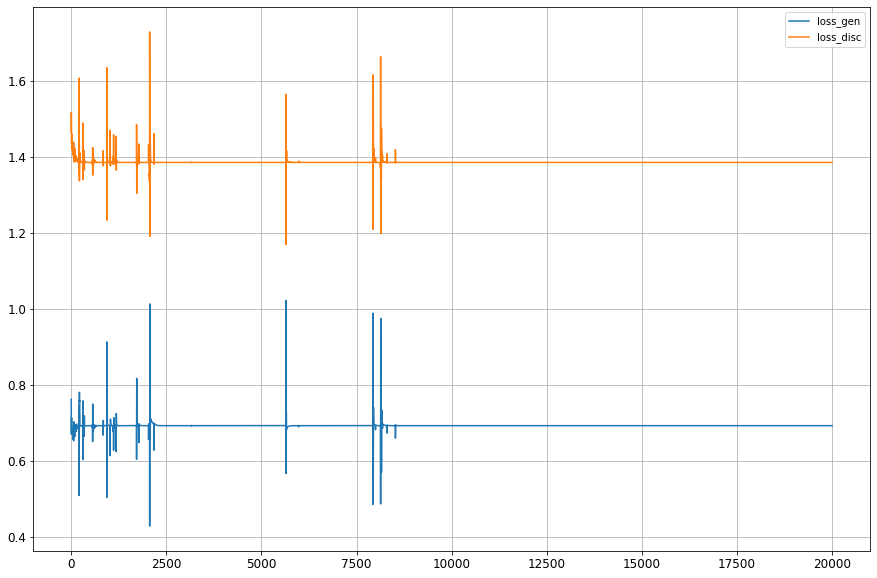

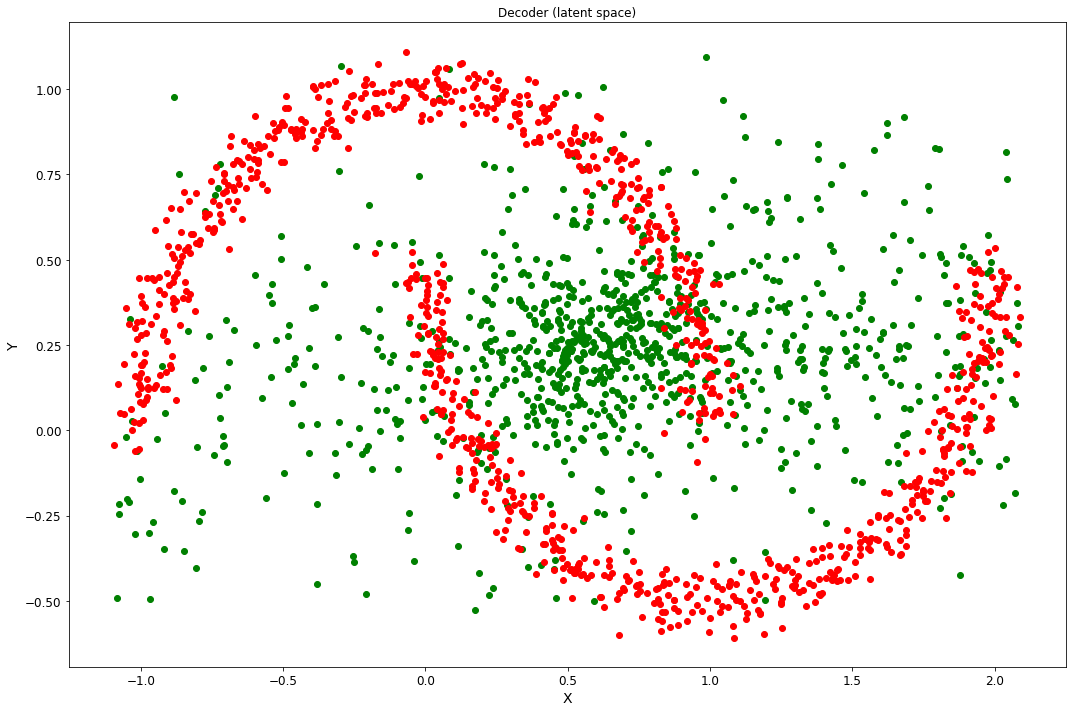

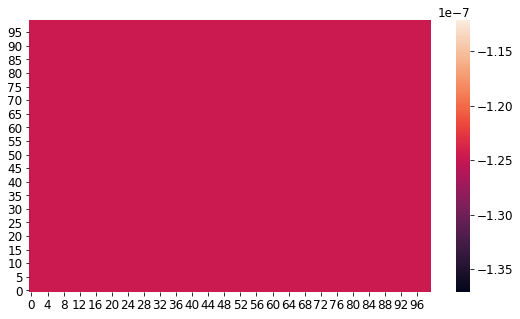

Epoch 20001/40000
Epoch 20002/40000
Epoch 20003/40000
Epoch 20004/40000
Epoch 20005/40000
Epoch 20006/40000
Epoch 20007/40000
Epoch 20008/40000
Epoch 20009/40000
Epoch 20010/40000
Epoch 20011/40000
Epoch 20012/40000
Epoch 20013/40000
Epoch 20014/40000
Epoch 20015/40000
Epoch 20016/40000
Epoch 20017/40000
Epoch 20018/40000
Epoch 20019/40000
Epoch 20020/40000
Epoch 20021/40000
Epoch 20022/40000
Epoch 20023/40000
Epoch 20024/40000
Epoch 20025/40000
Epoch 20026/40000
Epoch 20027/40000
Epoch 20028/40000
Epoch 20029/40000
Epoch 20030/40000
Epoch 20031/40000
Epoch 20032/40000
Epoch 20033/40000
Epoch 20034/40000
Epoch 20035/40000
Epoch 20036/40000
Epoch 20037/40000
Epoch 20038/40000
Epoch 20039/40000
Epoch 20040/40000
Epoch 20041/40000
Epoch 20042/40000
Epoch 20043/40000
Epoch 20044/40000
Epoch 20045/40000
Epoch 20046/40000
Epoch 20047/40000
Epoch 20048/40000
Epoch 20049/40000
Epoch 20050/40000
Epoch 20051/40000
Epoch 20052/40000
Epoch 20053/40000
Epoch 20054/40000
Epoch 20055/40000
Epoch 2005

Epoch 20457/40000
Epoch 20458/40000
Epoch 20459/40000
Epoch 20460/40000
Epoch 20461/40000
Epoch 20462/40000
Epoch 20463/40000
Epoch 20464/40000
Epoch 20465/40000
Epoch 20466/40000
Epoch 20467/40000
Epoch 20468/40000
Epoch 20469/40000
Epoch 20470/40000
Epoch 20471/40000
Epoch 20472/40000
Epoch 20473/40000
Epoch 20474/40000
Epoch 20475/40000
Epoch 20476/40000
Epoch 20477/40000
Epoch 20478/40000
Epoch 20479/40000
Epoch 20480/40000
Epoch 20481/40000
Epoch 20482/40000
Epoch 20483/40000
Epoch 20484/40000
Epoch 20485/40000
Epoch 20486/40000
Epoch 20487/40000
Epoch 20488/40000
Epoch 20489/40000
Epoch 20490/40000
Epoch 20491/40000
Epoch 20492/40000
Epoch 20493/40000
Epoch 20494/40000
Epoch 20495/40000
Epoch 20496/40000
Epoch 20497/40000
Epoch 20498/40000
Epoch 20499/40000
Epoch 20500/40000
Epoch 20501/40000
Epoch 20502/40000
Epoch 20503/40000
Epoch 20504/40000
Epoch 20505/40000
Epoch 20506/40000
Epoch 20507/40000
Epoch 20508/40000
Epoch 20509/40000
Epoch 20510/40000
Epoch 20511/40000
Epoch 2051

KeyboardInterrupt: 

In [15]:
hist = train(train_dataset, epochs)#55000

### Plot Loss

In [ ]:
epochs = epochs

In [ ]:
from PIL import Image

#plot the loss
loss = Image.open('AAE/Losses/loss_'+'_v'+str(k)+'_epoch_'+str(epoch+1)+'.png')
plt.figure("Loss",figsize=[15,10])
plt.imshow(loss)


### Samping from the latent space

In [ ]:
#plot the loss
loss = Image.open('AAE/Result/v_'+str(k)+'_epochs_'+str(epochs)+'.png')
plt.figure("Loss",figsize=[15,10])
plt.imshow(loss)

In [ ]:
#plot the loss
generated = Image.open('AAE/Result/v_'+str(k)+'_epochs_'+str(epochs)+'.png')
plt.figure("Generated",figsize=[15,10])
plt.imshow(loss)

#plot the loss
heatmap = Image.open('AAE/Result/Countour_Line'+'heatmap_v'+str(k)+'_epochs'+str(epoch+1)+'.png')
plt.figure("Heatmap",figsize=[15,10])
plt.imshow(loss)

# Applying the prediction

In [ ]:
# define these for desired prediction
x_input = [-4,-3,-2,-1,0,1,2,3,4]
n_points = 900
y_min = -1
y_max = 1

# produces an input of fixed x coordinates with random y values
predict1 = np.full((n_points//9, n_features), x_input[0])
predict2 = np.full((n_points//9, n_features), x_input[1])
predict3 = np.full((n_points//9, n_features), x_input[2])
predict4 = np.full((n_points//9, n_features), x_input[3])
predict5 = np.full((n_points//9, n_features), x_input[4])
predict6 = np.full((n_points//9, n_features), x_input[5])
predict7 = np.full((n_points//9, n_features), x_input[6])
predict8 = np.full((n_points//9, n_features), x_input[7])
predict9 = np.full((n_points//9, n_features), x_input[8])

predictthis = np.concatenate((predict1, predict2, predict3, predict4, predict5, predict6, predict7, predict8, predict9))
predictthis_scaled = scaler.transform(predictthis)
input_test = predictthis_scaled.reshape(n_points, n_features).astype('float32')


print("input_test :",input_test.shape)
plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()
    

In [ ]:
optimizer = tf.optimizers.Adam(0.0001, beta_1=0.9)


def mse_loss(inp, outp):
    """
    Calculates the MSE loss between the x-coordinates
    """
    inp = tf.reshape(inp, [-1, n_features])
    outp = tf.reshape(outp, [-1, n_features])
        
    print("input:",inp.shape)
    print("input:",outp.shape)
    return mse(inp[:,0], outp[:,0])
    

def opt_step(latent_values, real_coding):
    """
        Minimizes the loss between generated point and inputted point
        """
    with tf.GradientTape() as tape:
        tape.watch(latent_values)
        gen_output = decoder(latent_values, training=False)
        loss = mse_loss(real_coding, gen_output)

    gradient = tape.gradient(loss, latent_values)
    optimizer.apply_gradients(zip([gradient], [latent_values]))

    return loss

            
            
def optimize_coding(real_coding):
    """
    the latent space values
    """
    latent_values = np.random.normal(0, 1, size=([len(real_coding), latent_space]))
    latent_values = tf.Variable(latent_values)

    loss = []
    
    for epoch in range(10000):#10000):
        loss.append(opt_step(latent_values, real_coding).numpy())

    return latent_values            
            
def predict(input_data):

    predicted_vals = np.zeros((1, n_features))
    unscaled = scaler.inverse_transform(input_data)
    latent_values = optimize_coding(input_data)

    predicted_vals_1 = scaler.inverse_transform((decoder.predict(tf.convert_to_tensor(latent_values))).reshape(len(input_data), n_features))
    predicted_vals_1 = predicted_vals_1.reshape(len(input_data), n_features)

In [ ]:
X_generated = predict(input_test)

print("X_generated :",X_generated)

In [ ]:
if scenario in ("3d", "helix"):
    
    ax = plt.subplot(projection='3d')
    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], label='Generated Data')


    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(X_generated[:,0],X_generated[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(X_generated[:,1],X_generated[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(X_generated[:,0],X_generated[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(X_generated[:,0]>=-0.8-0.05,X_generated[:,0]<=-0.8+0.05),X_generated[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(X_generated[:,0]>=0.0-0.05,X_generated[:,0]<=0.0+0.05),X_generated[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(X_generated[:,0]>=0.8-0.05,X_generated[:,0]<=0.8+0.05),X_generated[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(X_generated[:,1]>=0.2-0.05,X_generated[:,1]<=0.2+0.05),X_generated[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(X_generated[:,1]>=0.5-0.05,X_generated[:,1]<=0.5+0.05),X_generated[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(X_generated[:,1]>=0.8-0.05,X_generated[:,1]<=0.8+0.05),X_generated[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    #print("Generated Data:",X_generated.shape)
    plt.scatter(X_train, y_train,c='orange') 
    plt.scatter(X_generated[:,0],X_generated[:,1])
    #plt.scatter(predicted_values4[:,0],predicted_values4[:,1],c='grey')#X_trained_scaled
    #plt.scatter(predicted_values2[:,0],predicted_values2[:,1])
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    plt.savefig('AAE/Prediction/'+str(epochs)+'.png')
    